In [1]:
import pandas as pd
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info


d:\DRIVE_PORTATIL2\Portatil2\Desktop\Personal\PLATZI\.venv\lib\site-packages\janitor\utils.py:84: FutureWarning: PandasArray has been renamed NumpyExtensionArray. Use that instead. This alias will be removed in a future version.
  @_expand_grid.register(pd.arrays.PandasArray)


In [2]:
preprocessed_penguins_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

## Establecer apariencia general de los gráficos


In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos
**Utilizando el paquete palmerpenguins**

Datos crudos

In [4]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

**Utilizando el paquete palmerpenguins**

Datos preprocesados

In [5]:
raw_penguins_df = palmerpenguins.load_penguins()
raw_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

**Utilizando Seaborn**


In [6]:
sns.load_dataset('penguins')

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

## Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?



In [7]:
preprocessed_penguins_df.dtypes


species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?


In [8]:
preprocessed_penguins_df.dtypes.value_counts()


float64    4
object     3
int64      1
Name: count, dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?


In [9]:
preprocessed_penguins_df.shape

(344, 8)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [10]:
preprocessed_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?


In [11]:
preprocessed_penguins_df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [12]:
preprocessed_penguins_df.isnull().sum().sum()

19

## ¿Cuál es la proporción de valores nulos por cada variable?

In [13]:
preprocessed_penguins_df.isnull().melt()

variable  value
0     species  False
1     species  False
2     species  False
3     species  False
4     species  False
...       ...    ...
2747     year  False
2748     year  False
2749     year  False
2750     year  False
2751     year  False

[2752 rows x 2 columns]

## ¿Cuál es la proporción de valores nulos por cada variable? PLOT

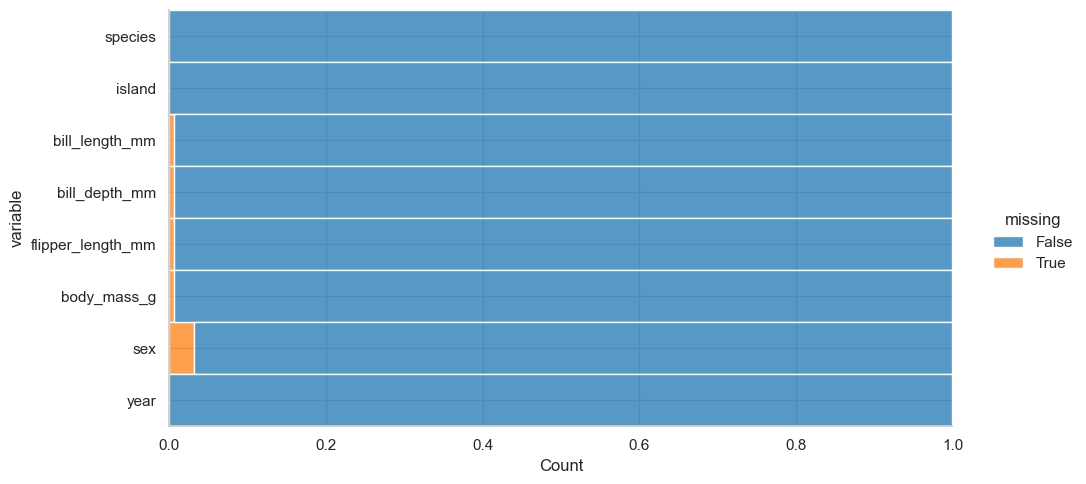

In [14]:
def create_missing_plot(df):
    sns.displot(data=df,y='variable',hue='missing',multiple='fill',aspect=2)


melted_df = (
    preprocessed_penguins_df
    .isnull()
    .melt(value_name='missing')
)

create_missing_plot(melted_df)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?


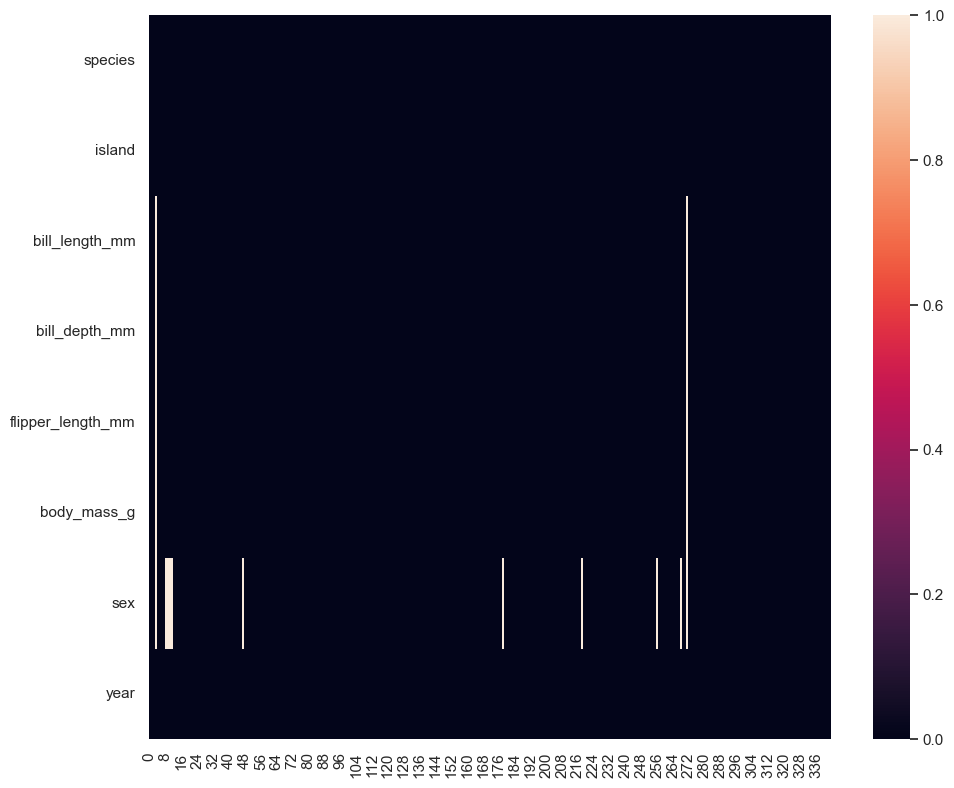

In [15]:
def plot_miss(df):
    sns.heatmap(data=df)

transposed = (
preprocessed_penguins_df.isnull().transpose())

plot_miss(transposed)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos? PLOT



In [16]:
preprocessed_penguins_df.isnull().transpose()

0      1      2      3      4      5      6      7    \
species            False  False  False  False  False  False  False  False   
island             False  False  False  False  False  False  False  False   
bill_length_mm     False  False  False   True  False  False  False  False   
bill_depth_mm      False  False  False   True  False  False  False  False   
flipper_length_mm  False  False  False   True  False  False  False  False   
body_mass_g        False  False  False   True  False  False  False  False   
sex                False  False  False   True  False  False  False  False   
year               False  False  False  False  False  False  False  False   

                     8      9    ...    334    335    336    337    338  \
species            False  False  ...  False  False  False  False  False   
island             False  False  ...  False  False  False  False  False   
bill_length_mm     False  False  ...  False  False  False  False  False   
bill_depth_mm      False  False  ...  False  False  False  False  False   
flipper_length_mm  False  False  ...  False  False  False  False  False   
body_mass_g        False  False  ...  False  False  False  False  False   
sex                 True   True  ...  False  False  False  False  False   
year               False  False  ...  False  False  False  False  False   

                     339    340    341    342    343  
species            False  False  False  False  False  
island             False  False  False  False  False  
bill_length_mm     False  False  False  False  False  
bill_depth_mm      False  False  False  False  False  
flipper_length_mm  False  False  False  False  False  
body_mass_g        False  False  False  False  False  
sex                False  False  False  False  False  
year               False  False  False  False  False  

[8 rows x 344 columns]

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?


In [17]:
processed_penguins_df= preprocessed_penguins_df.dropna()
print(preprocessed_penguins_df.shape)
print(processed_penguins_df.shape)
processed_penguins_df

(344, 8)
(333, 8)


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

# Conteos y proporciones
## Preludio: ¿Qué estadísticos describen el conjunto de datos?
**Todas las variables**


In [18]:
processed_penguins_df.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex         year  
count    333.000000   333   333.000000  
unique          NaN     2          NaN  
top             NaN  male          NaN  
freq            NaN   168          NaN  
mean    4207.057057   NaN  2008.042042  
std      805.215802   NaN     0.812944  
min     2700.000000   NaN  2007.000000  
25%     3550.000000   NaN  2007.000000  
50%     4050.000000   NaN  2008.000000  
75%     4775.000000   NaN  2009.000000  
max     6300.000000   NaN  2009.000000

**solo numericas**

In [19]:
processed_penguins_df.describe(include=[np.number])

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

**Solo categoricas 1**

In [20]:
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

**solo categoricas 2**

In [21]:
processed_penguins_df.astype({
    'species':'category',
    'island':'category',
    'sex':'category'
}).describe(include='category')

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

## ¿Cómo visualizar los conteos?
**pandas**

<Axes: xlabel='species'>

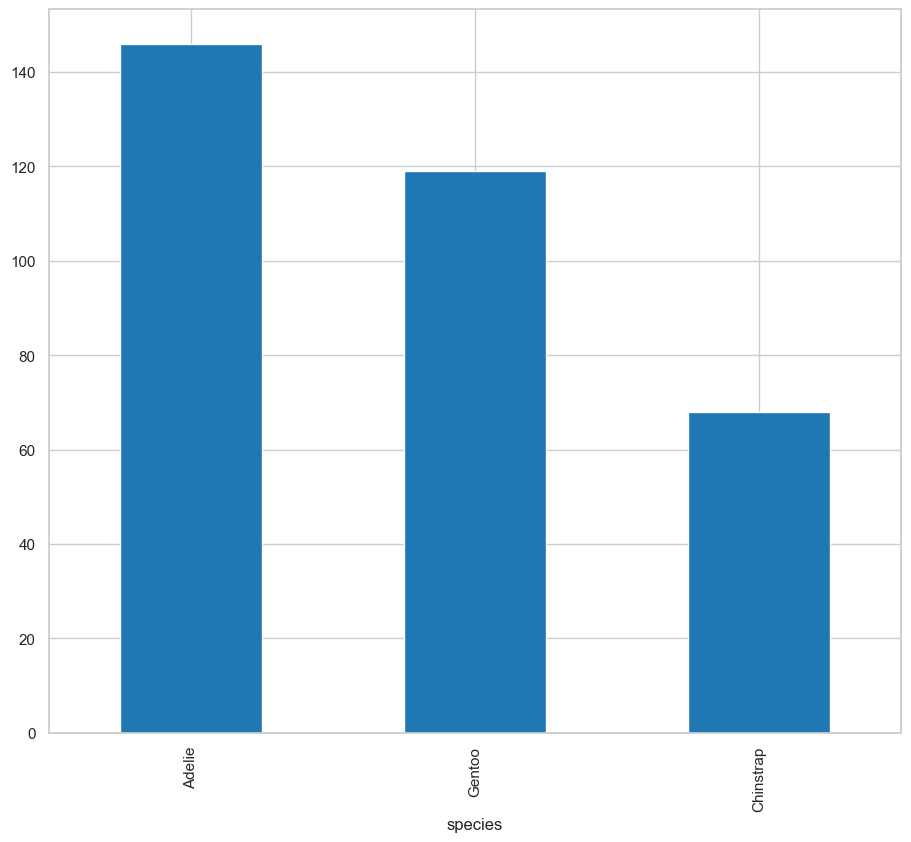

In [22]:
processed_penguins_df.species.value_counts().plot(kind='bar')

**Seaborn**

In [23]:


processed_penguins_df.value_counts('species', sort=True).reset_index(name='count')

species  count
0     Adelie    146
1     Gentoo    119
2  Chinstrap     68

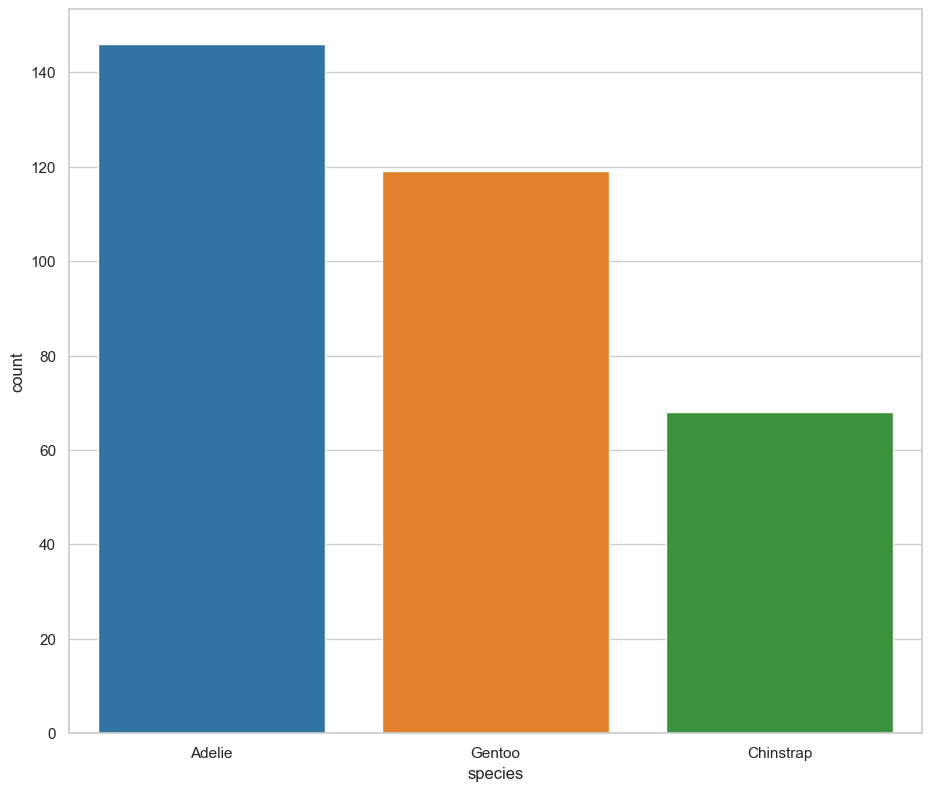

In [24]:
ext =(processed_penguins_df
      .value_counts('species',sort=True)
      .reset_index(name='count')
      )

def create_species_count_plot(df):
    sns.barplot(data=df,
                x='species',
                y='count',
                hue='species')

create_species_count_plot(ext)

## ¿Cómo visualizar las proporciones?


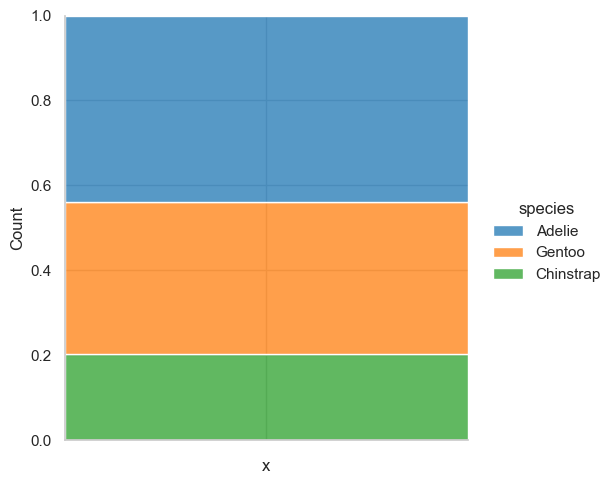

In [25]:
ext2 = (
    processed_penguins_df.add_column('x','')
)

def plot_portion(df):
    sns.displot(data=df,
                x='x',
                hue='species',
                multiple='fill'
                )

plot_portion(ext2)
    

# Medidas de tendencia central
## Media o promedio


In [26]:
processed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [27]:
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864867

In [28]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana


In [29]:
processed_penguins_df.median(numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [30]:
processed_penguins_df.mode(numeric_only=False)

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  year  
0       3800.0  male  2009

In [31]:
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

# Medidas de dispersión
## ¿Cuál es el valor máximo de las variables?


In [32]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor minimo de las variables?

In [33]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?


In [34]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?


In [35]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [36]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## ¿Cuál es el rango intercuartílico?


In [37]:
processed_penguins_df.quantile(0.75, numeric_only=True)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [38]:
processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [39]:
rangoInterq = processed_penguins_df.quantile(0.75, numeric_only=True) - processed_penguins_df.quantile(0.25, numeric_only=True)
print(rangoInterq)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64


In [40]:
processed_penguins_df.quantile(q=[0.75,0.5,0.25],numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g    year
0.75            48.6           18.7              213.0       4775.0  2009.0
0.50            44.5           17.3              197.0       4050.0  2008.0
0.25            39.5           15.6              190.0       3550.0  2007.0

In [41]:

(   
processed_penguins_df.quantile(q=[0.75,0.5,0.25],numeric_only=True).transpose()
.rename_axis('variable').reset_index().assign(iqr=lambda df:df[0.75]-df[0.25])
)
    

variable    0.75     0.5    0.25     iqr
0     bill_length_mm    48.6    44.5    39.5     9.1
1      bill_depth_mm    18.7    17.3    15.6     3.1
2  flipper_length_mm   213.0   197.0   190.0    23.0
3        body_mass_g  4775.0  4050.0  3550.0  1225.0
4               year  2009.0  2008.0  2007.0     2.0

# ¿Cómo puedo visualizar la distribución de una variable?
## Histograma

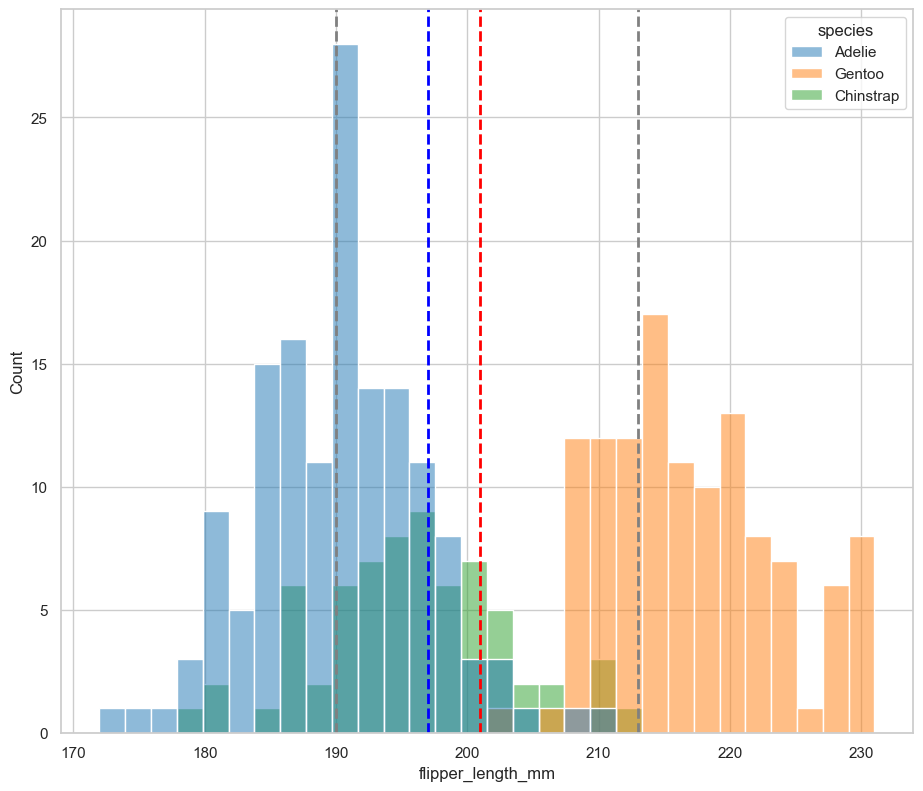

In [42]:
sns.histplot(data=processed_penguins_df,
             x='flipper_length_mm',
             bins=30,
             hue='species')

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='gray',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='gray',
    linestyle='dashed',
    linewidth=2
)

## Diagrama de caja / boxplot


<Axes: xlabel='flipper_length_mm'>

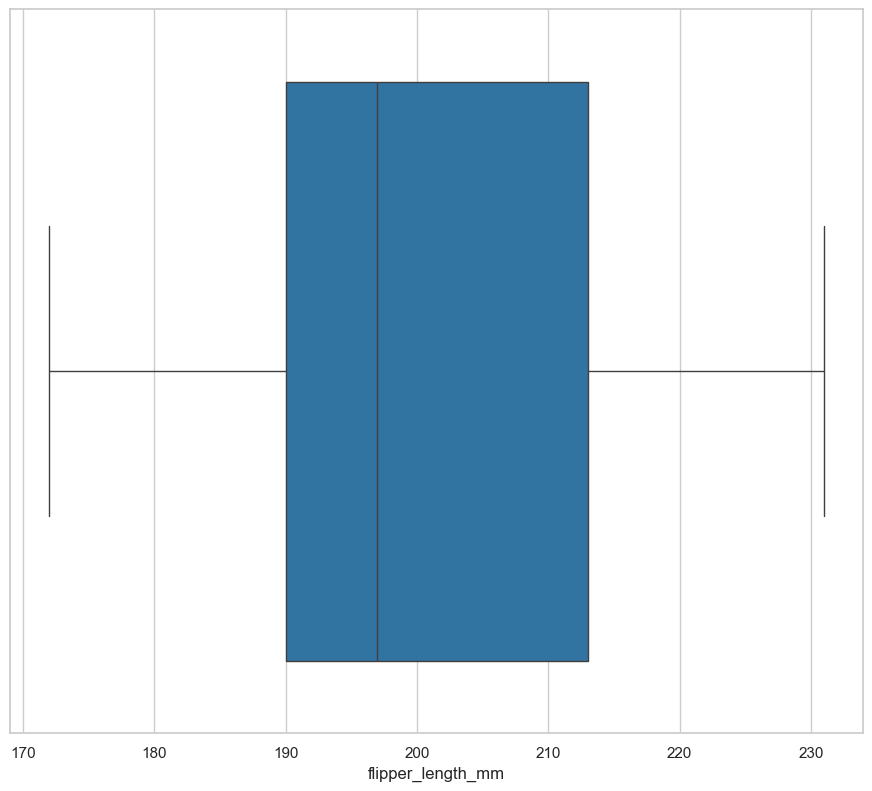

In [43]:
sns.boxplot(data=processed_penguins_df,
            x='flipper_length_mm')

## limitaciones

In [44]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

In [45]:
bins_sugge =freedman_diaconis_bindwidth(processed_penguins_df.flipper_length_mm)

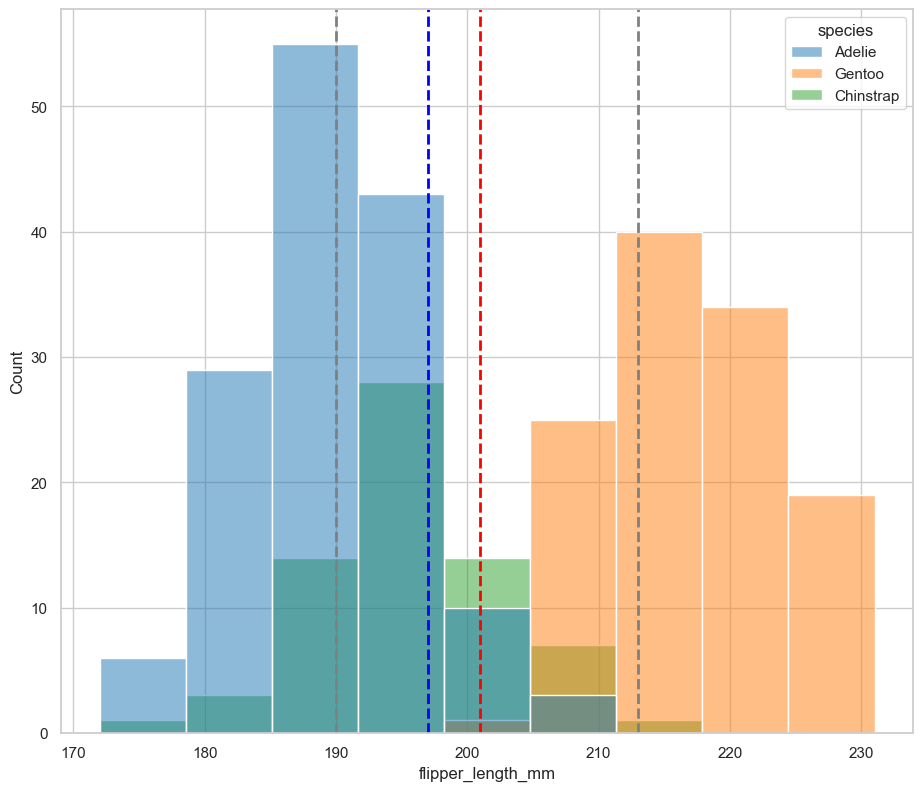

In [46]:
sns.histplot(data=processed_penguins_df,
             x='flipper_length_mm',
             binwidth=bins_sugge,
             hue='species')

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='gray',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='gray',
    linestyle='dashed',
    linewidth=2
)

# **Distribuciones: PMFs, CDFs y PDFs**
## Funciones de probabilidad de masas (PMFs)
**Utilizando seaborn**


<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

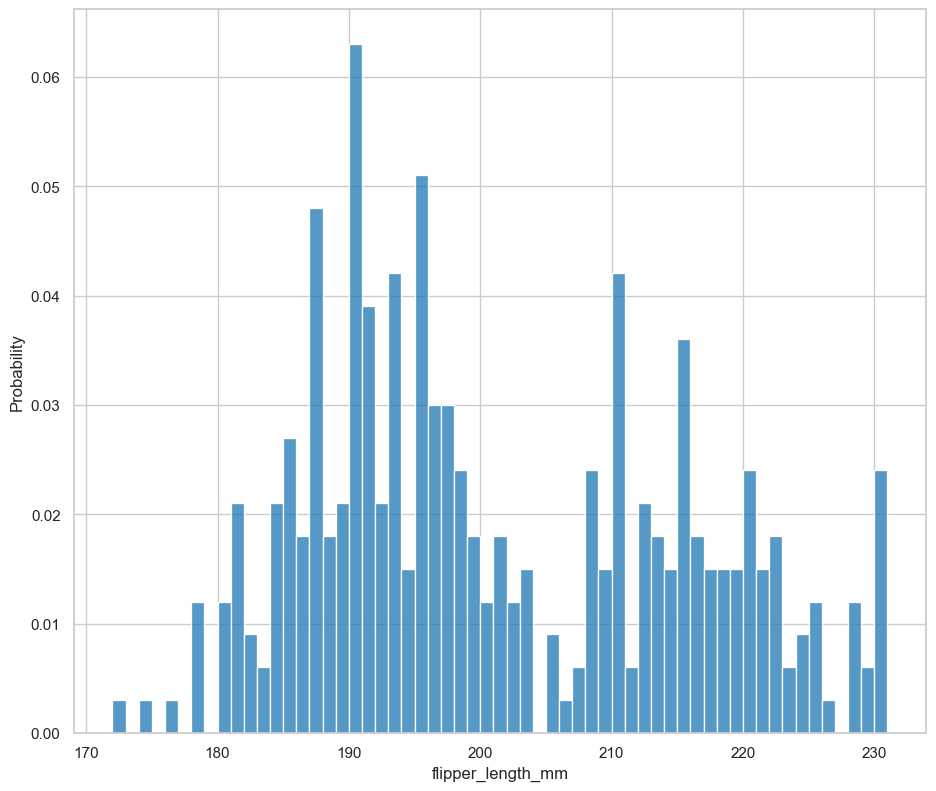

In [47]:
sns.histplot(data=processed_penguins_df,
             x='flipper_length_mm',
             binwidth=1,
             stat='probability')

**Utilizando empiricaldist**


In [48]:
pmf_flipper_length_mm=empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,normalize=True)



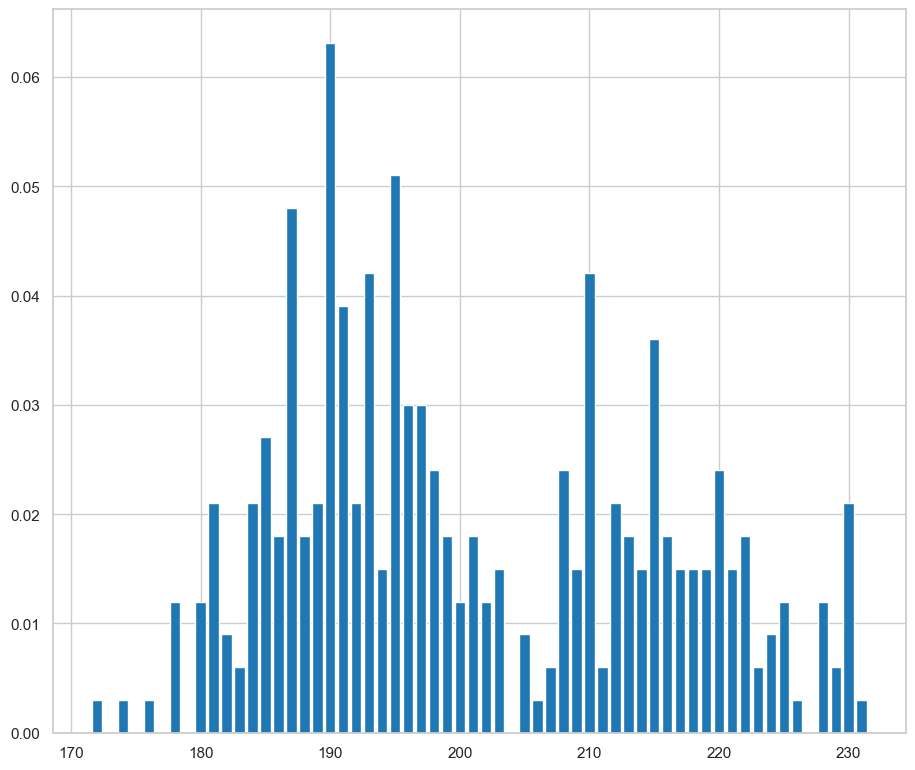

In [49]:
pmf_flipper_length_mm.bar()

In [50]:
pmf_flipper_length_mm(190)

0.06306306306306306

In [51]:
processed_penguins_df.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)
**Utilizando seaborn**


<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

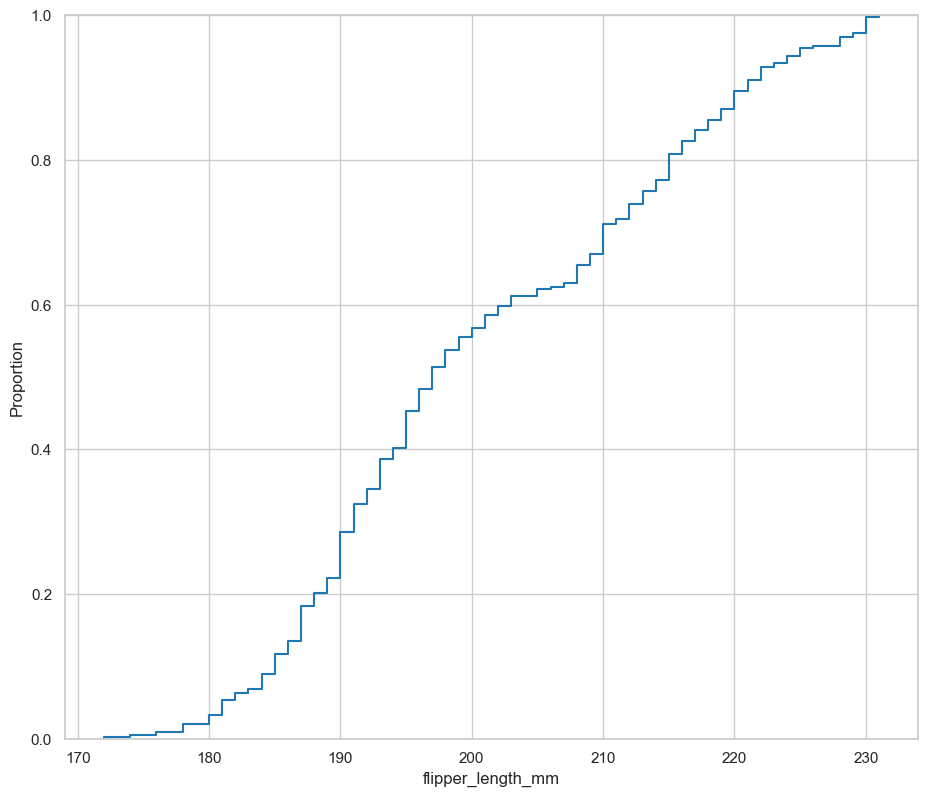

In [52]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

**Utilizando empiricaldist**

200 0.5675675675675675


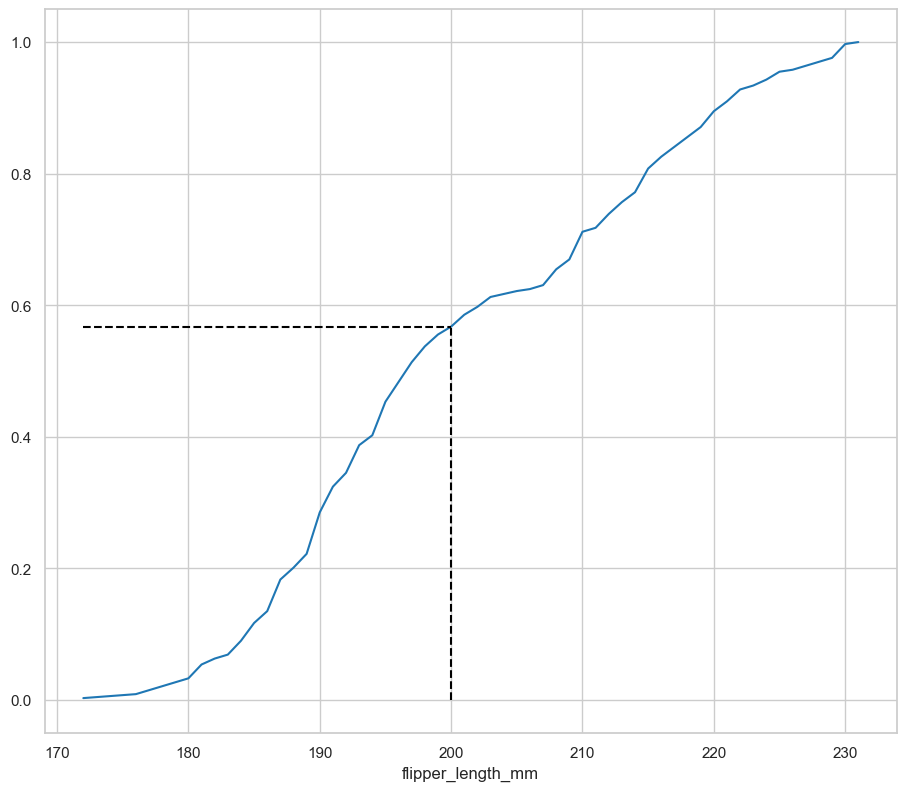

In [53]:
cdf_flipper_length_mm=empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

cdf_flipper_length_mm.plot()
q=200
p = cdf_flipper_length_mm(q)
print(q,p)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black', 
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle = 'dashed'
)
plt.plot(q,p)

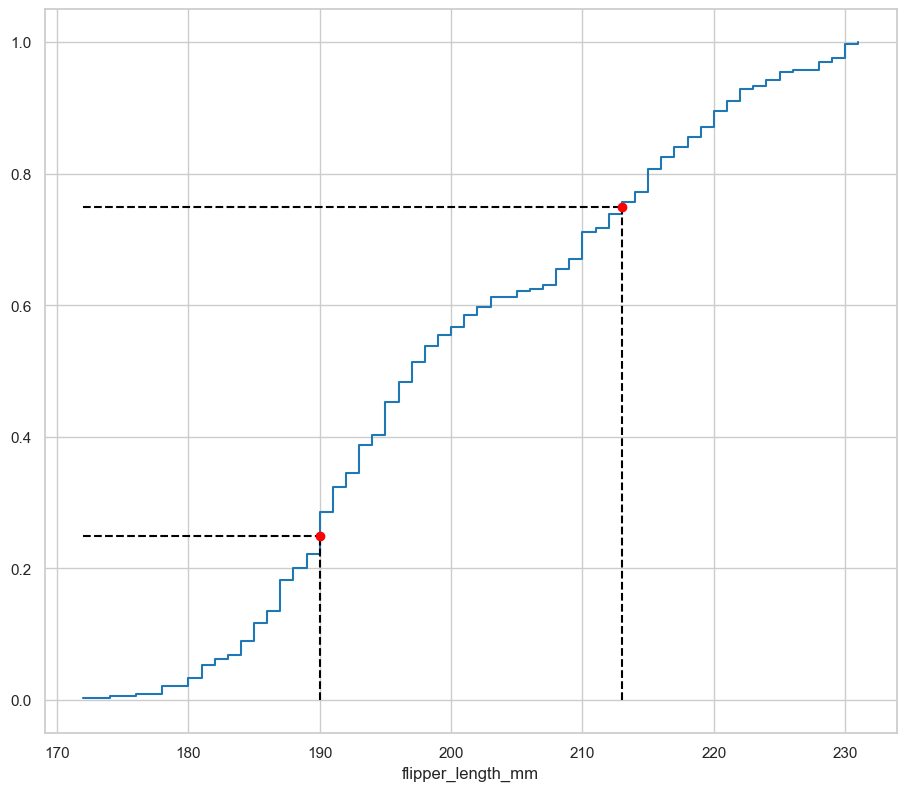

In [54]:
cdf_flipper_length_mm.step()

p_1 = 0.25 # Specify probability
p_2 = 0.75

ps = (0.25, 0.75) # IQR
qs = cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

**Comparando distribuciones**


<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

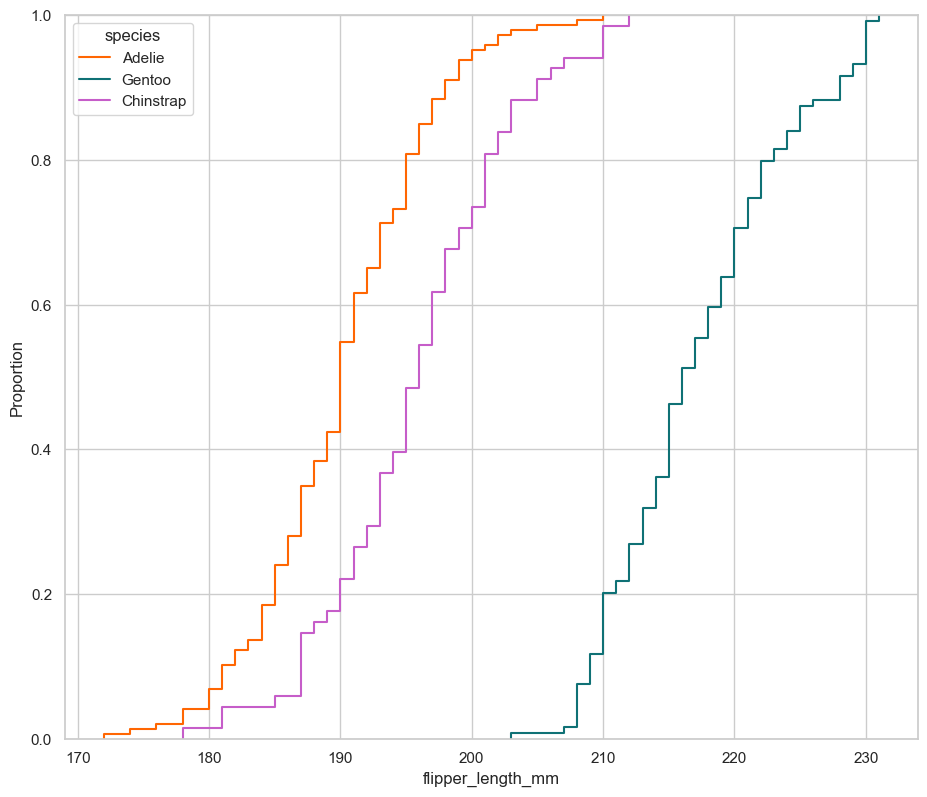

In [55]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

# Funciones de densidad de probabilidad


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

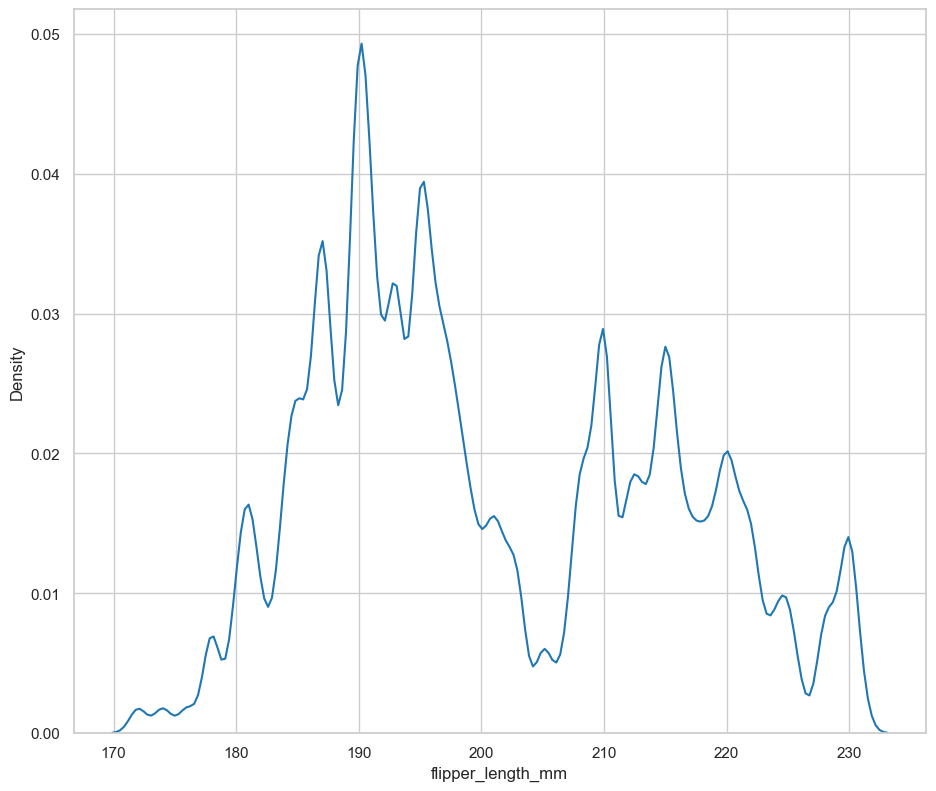

In [56]:
sns.kdeplot(data=processed_penguins_df,
            x='flipper_length_mm', 
            bw_method=0.05)

In [57]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

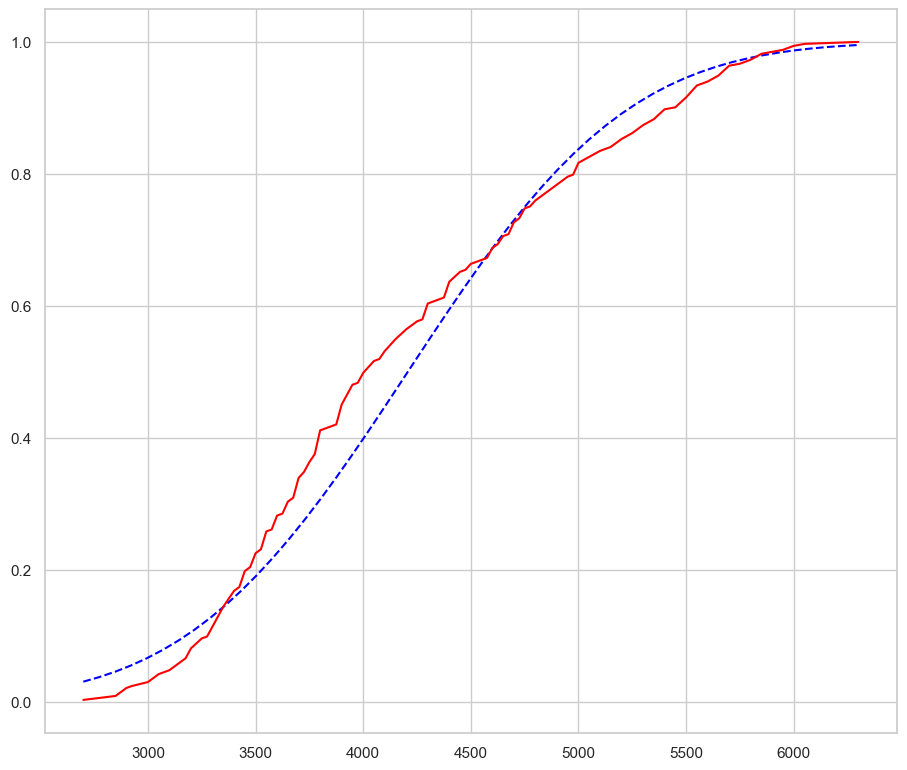

In [58]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)
plt.plot(xs, ys,'b',linestyle='dashed')
x3 = empiricaldist.Cdf.from_seq(processed_penguins_df.body_mass_g, normalize=True)
plt.plot(x3,'r')

<Axes: xlabel='body_mass_g', ylabel='Density'>

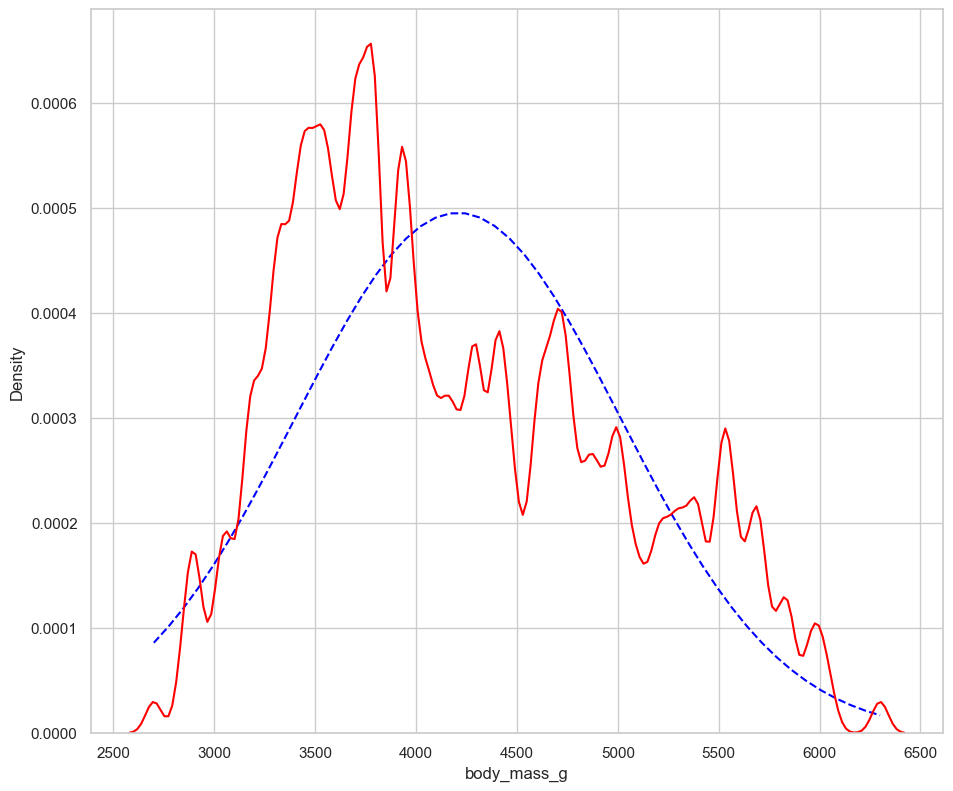

In [59]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)
plt.plot(xs, ys,'b', linestyle='dashed')
sns.kdeplot(data=processed_penguins_df,
            x='body_mass_g',
            color='red', 
            bw_method=0.05)


# **Ley de los Grandes Números y Teorema del Límite Central**


## Ley de los Grandes Números


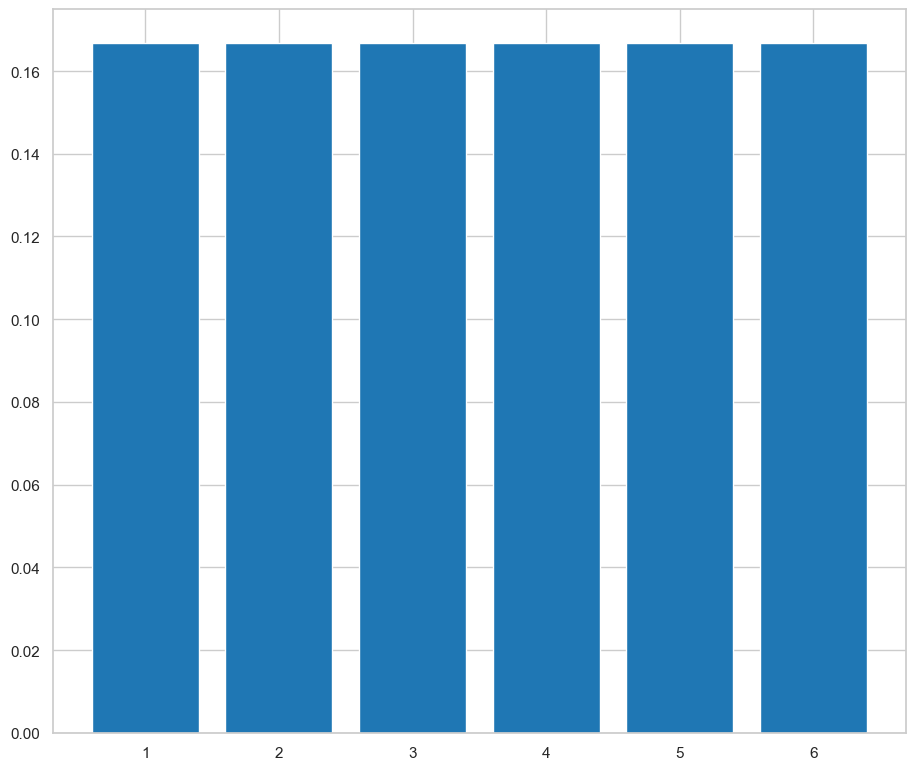

In [60]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

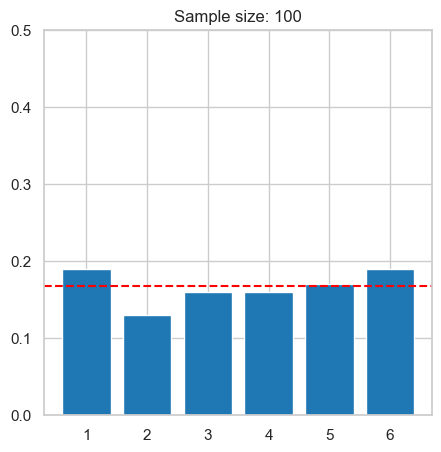

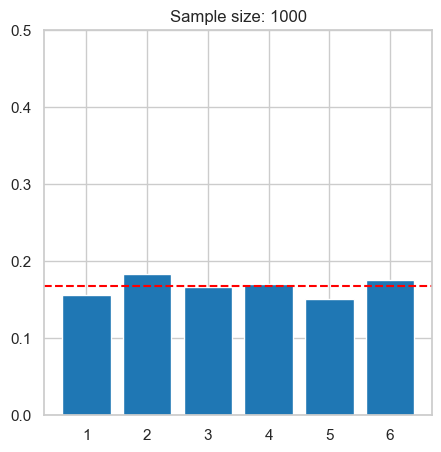

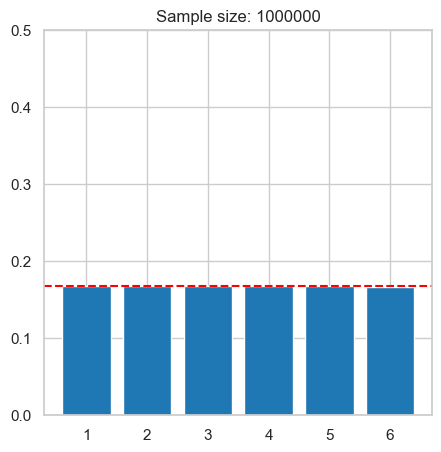

In [61]:
for sample_size in (1e2, 1e3, 1e6):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color = 'red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f"Sample size: {sample_size}")

## Teorema del límite central


In [62]:
processed_penguins_df.sex.value_counts(normalize=True)

sex
male      0.504505
female    0.495495
Name: proportion, dtype: float64

<Axes: xlabel='sex'>

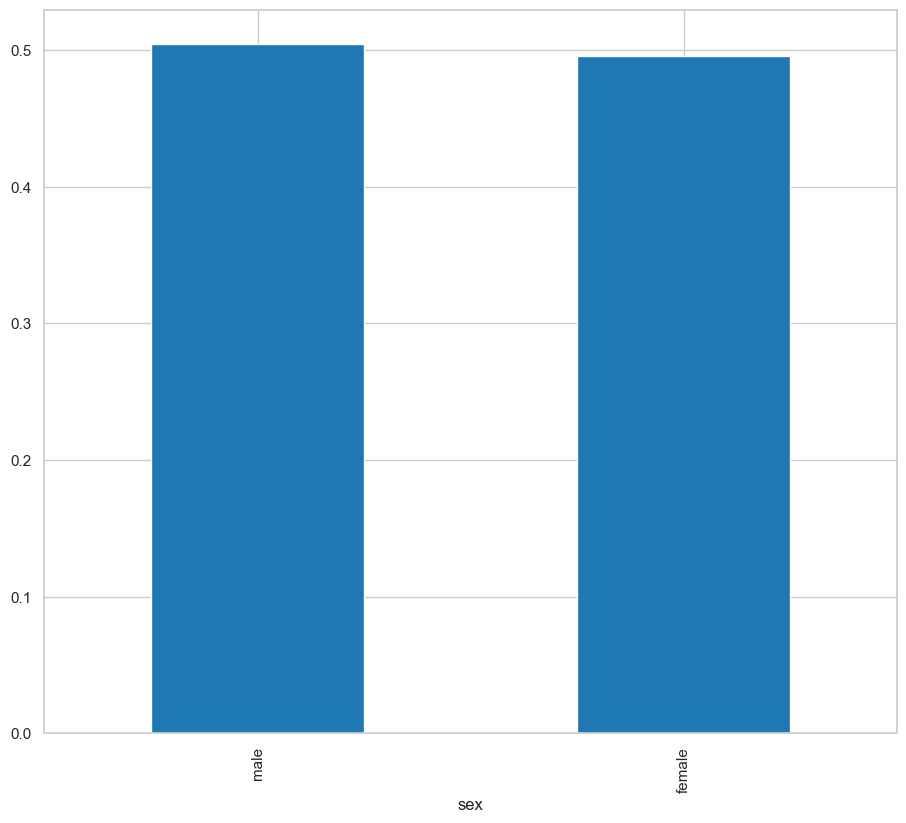

In [63]:
processed_penguins_df.sex.value_counts(normalize=True).plot(kind='bar')

In [64]:
pd.set_option('future.no_silent_downcasting', True)
sex_numeric = processed_penguins_df.sex.replace(['male','female'],[1,0])
sex_numeric

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: object

In [65]:
number_samples = 1000
sample_size=35

samples_df = pd.DataFrame()
# Crear una lista para almacenar cada muestra
samples_list = []

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_list.append( sex_numeric_sample)

# Concatenar todas las muestras en un DataFrame
samples_df = pd.DataFrame(samples_list).T

# Calcular el promedio de machos en la población
male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

Estimated percentage of male penguins in population is: 50.1829%


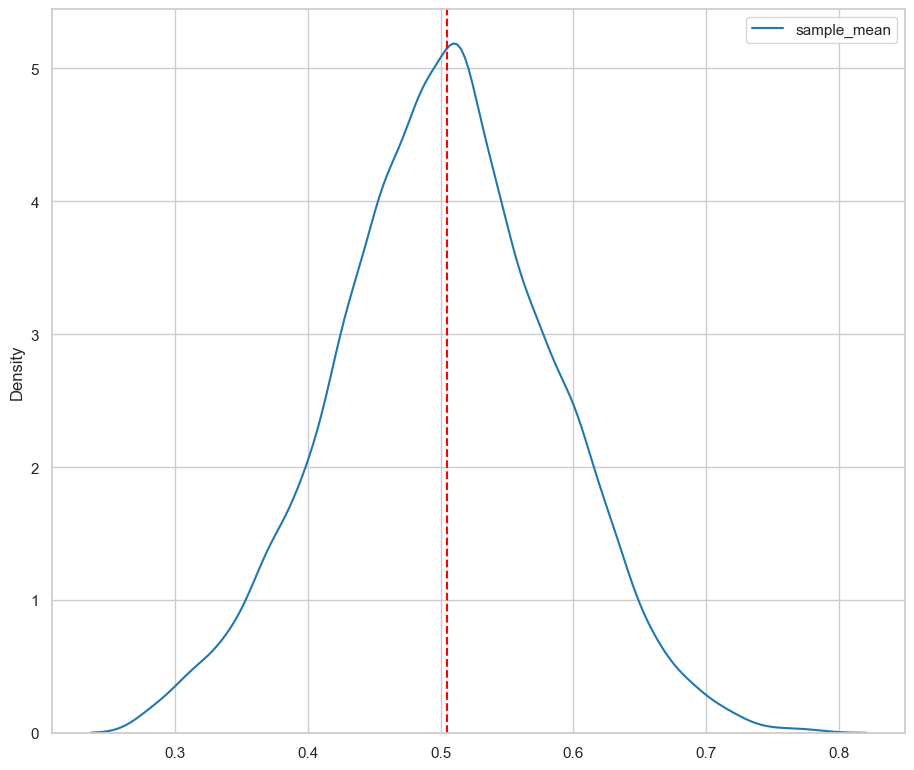

In [66]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial, bw_method=0.20)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [67]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

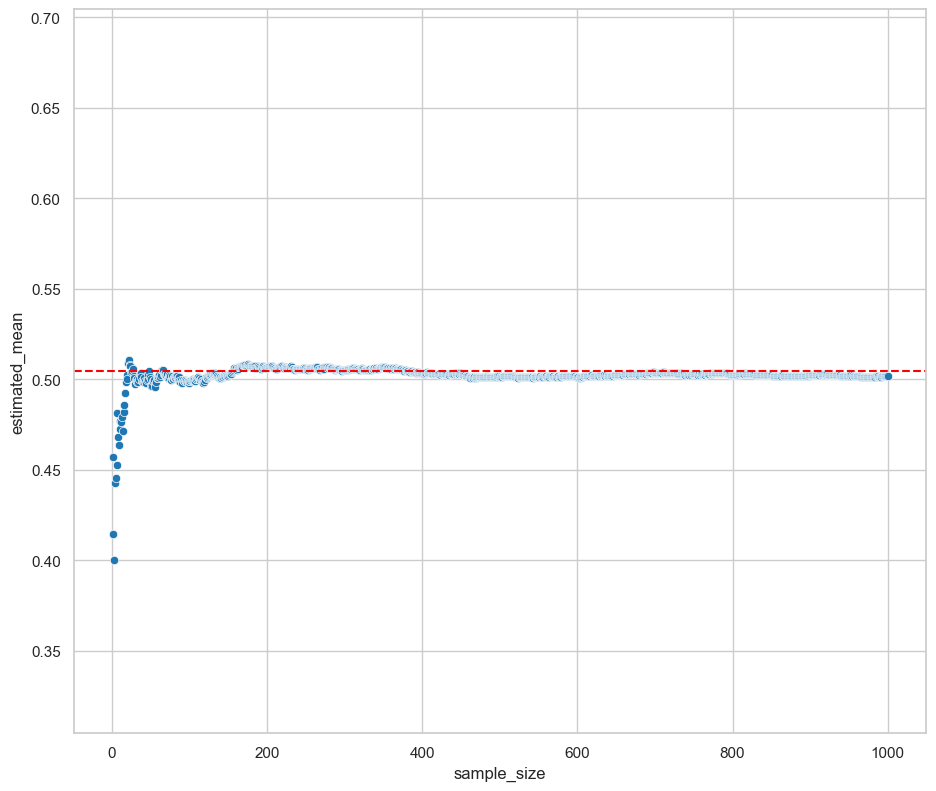

In [68]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Estableciendo relaciones:
## Gráfica de puntos


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

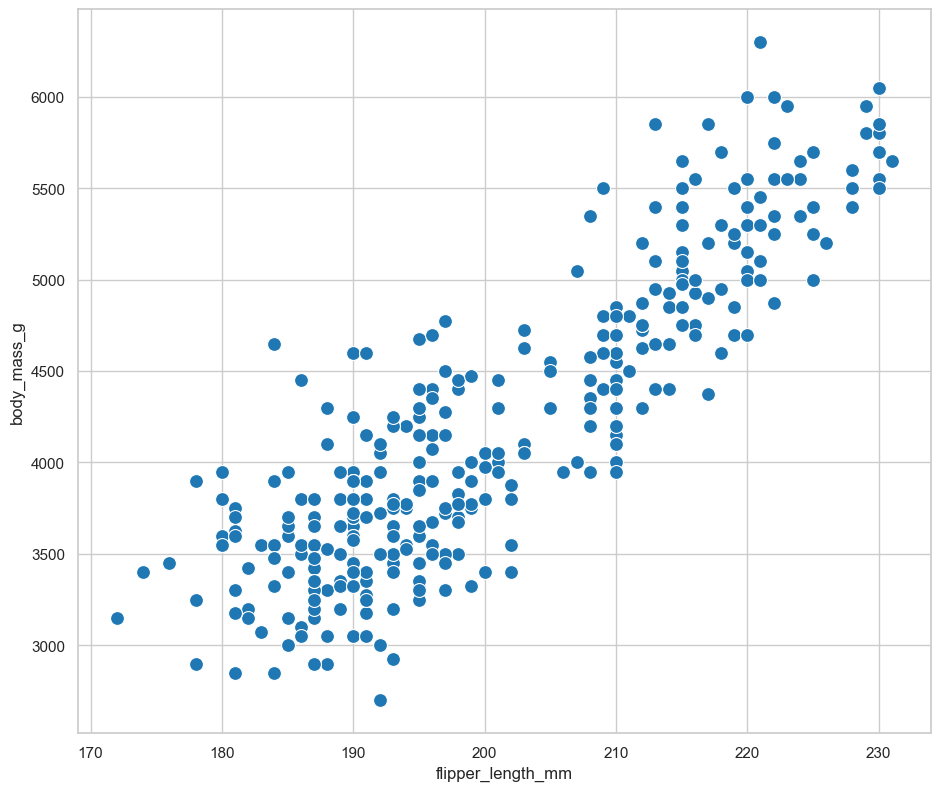

In [69]:

sns.scatterplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    s=100
)


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

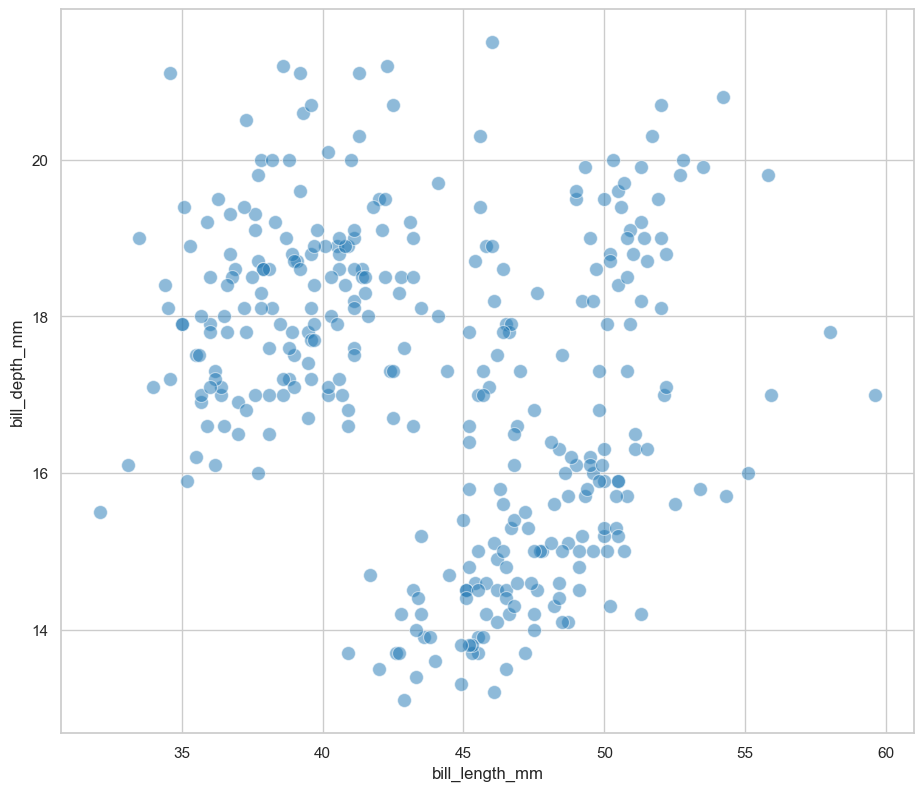

In [70]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    #hue='species',
    alpha=1/2,
    s=100
)

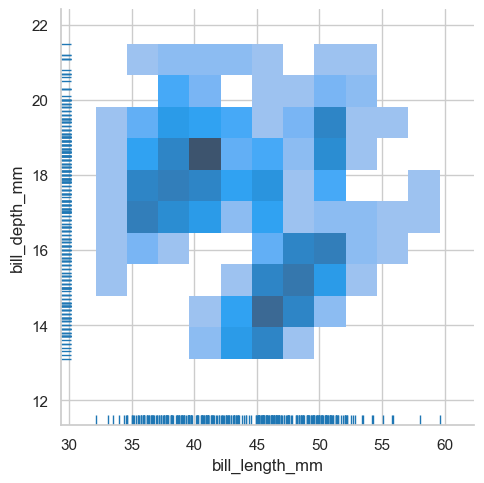

In [71]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
    #hue='species',   
)

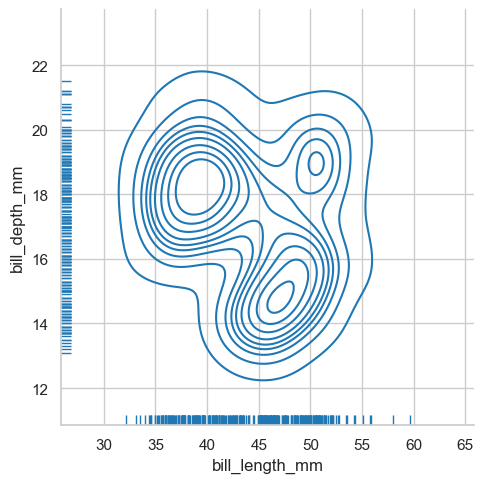

In [72]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    #hue='species',
    kind='kde'
)

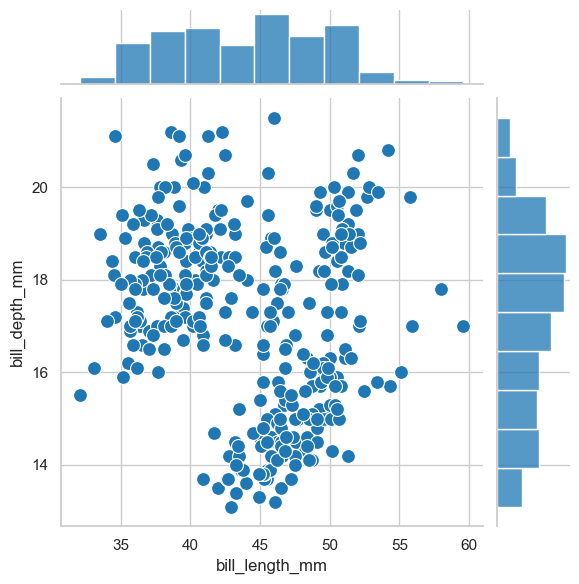

In [73]:
sns.jointplot(data=processed_penguins_df,
              x='bill_length_mm',
              y='bill_depth_mm',
              s=100,
              )

## Estableciendo relaciones: Gráficos de violín y boxplots


<Axes: xlabel='species', ylabel='flipper_length_mm'>

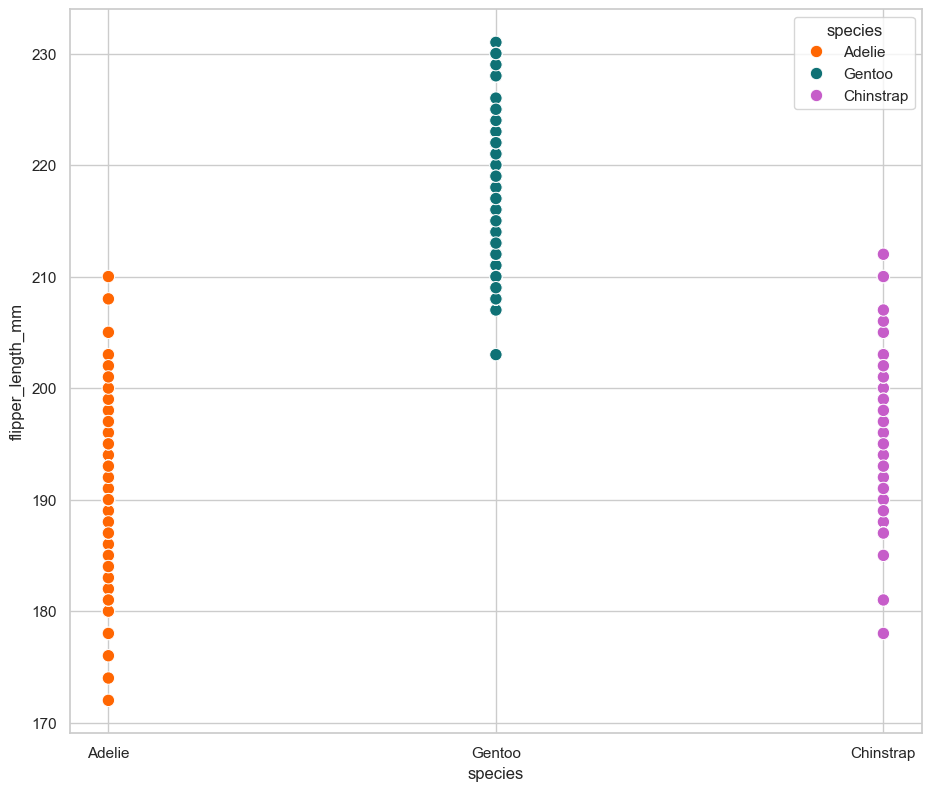

In [74]:
sns.scatterplot(data=processed_penguins_df,
                x='species',
                y='flipper_length_mm',
                s=80, 
                hue='species', 
                palette=penguin_color)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

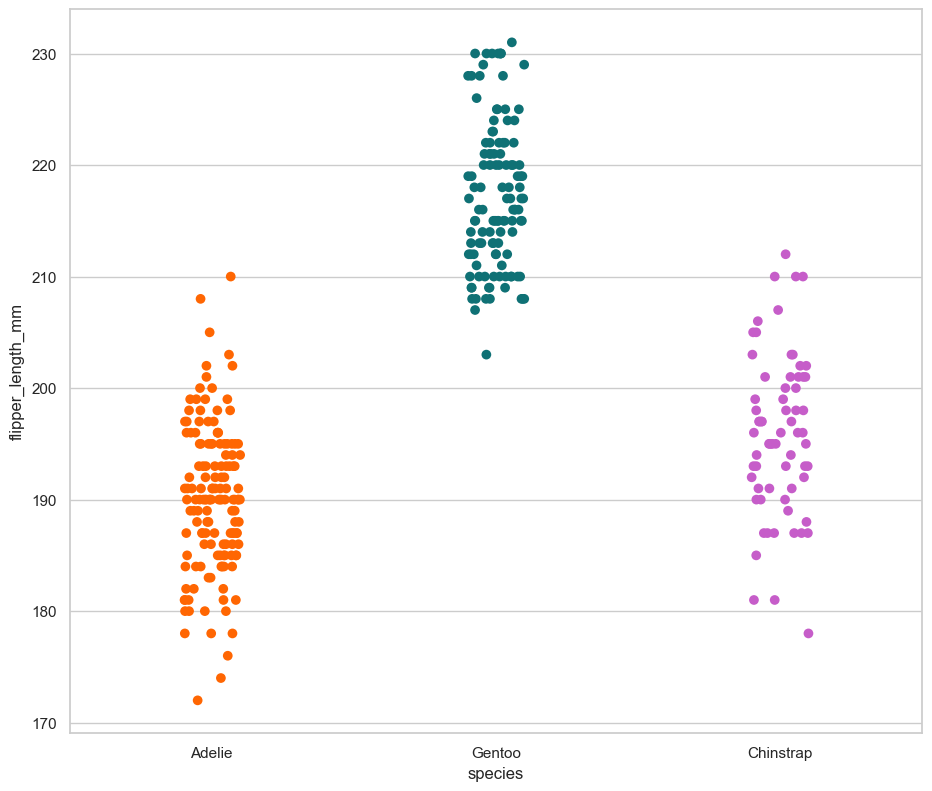

In [75]:
sns.stripplot(data=processed_penguins_df,
              x='species',
              y='flipper_length_mm',
              hue='species',
              palette=penguin_color,
              s=7)

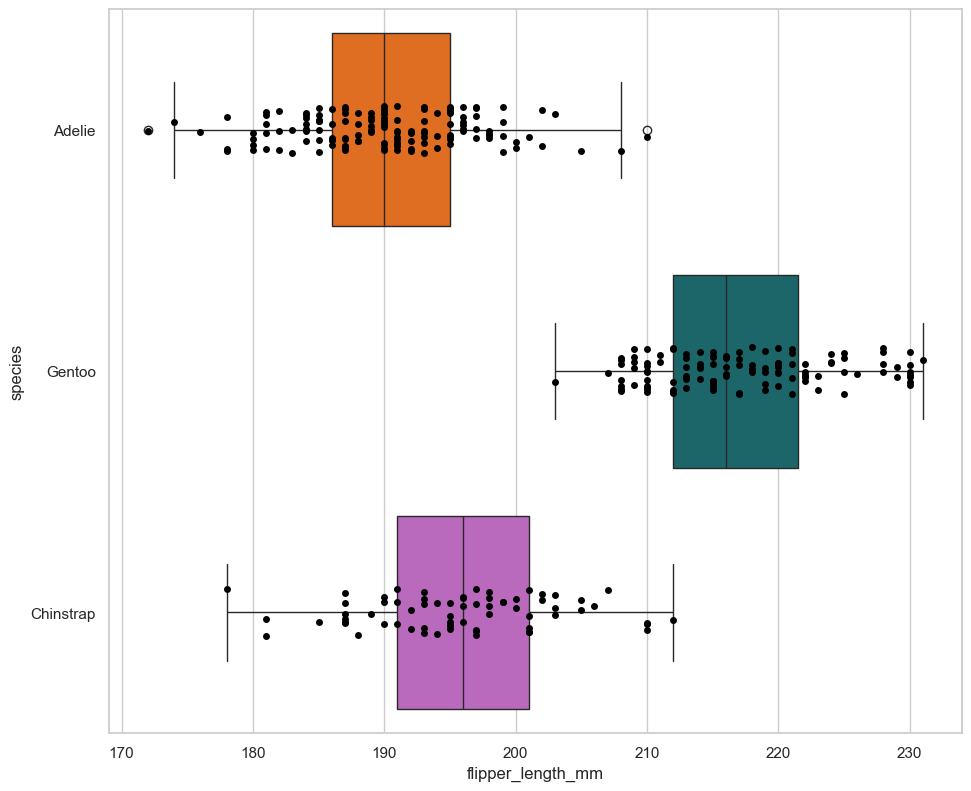

In [76]:
ax = sns.boxplot(data=processed_penguins_df,
            x='flipper_length_mm',
            y='species',
            hue='species',
            palette=penguin_color,
            )

ax = sns.stripplot(data=processed_penguins_df,
            x='flipper_length_mm',
            y='species',
            #hue='species',
            color='black',
            )

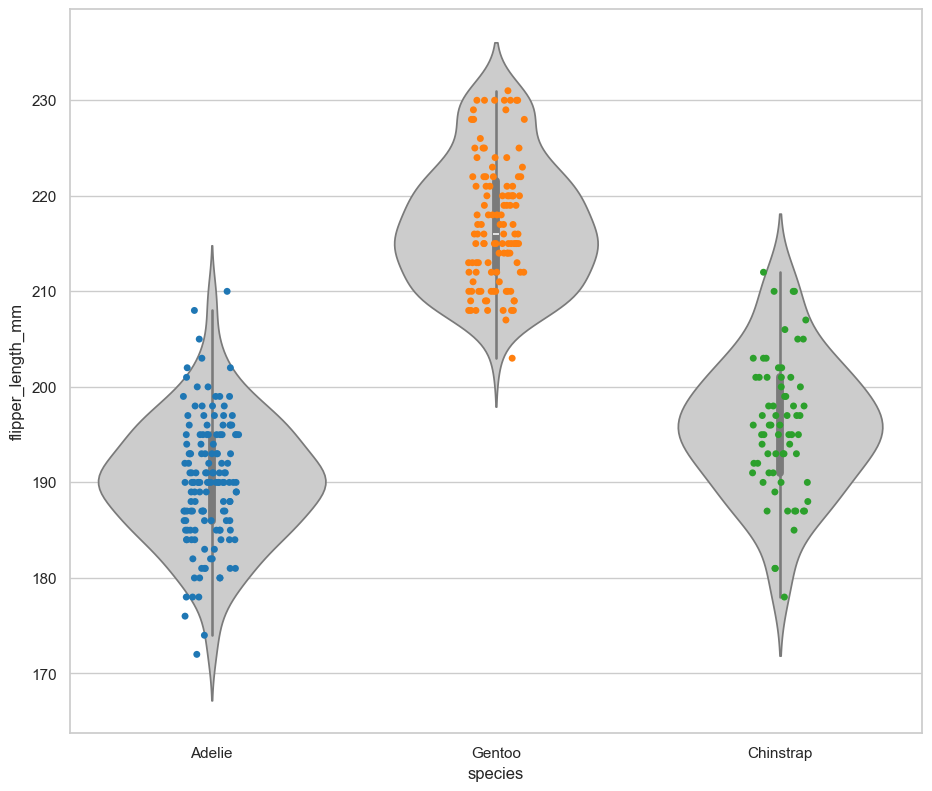

In [77]:
ax = sns.violinplot(data=processed_penguins_df,
                    x='species',
                    y='flipper_length_mm',
                    color='.8'
                    )

ax = sns.stripplot(data=processed_penguins_df,
            x='species',
            y='flipper_length_mm',           
            hue='species',
            
            )

<Axes: xlabel='species', ylabel='flipper_length_mm'>

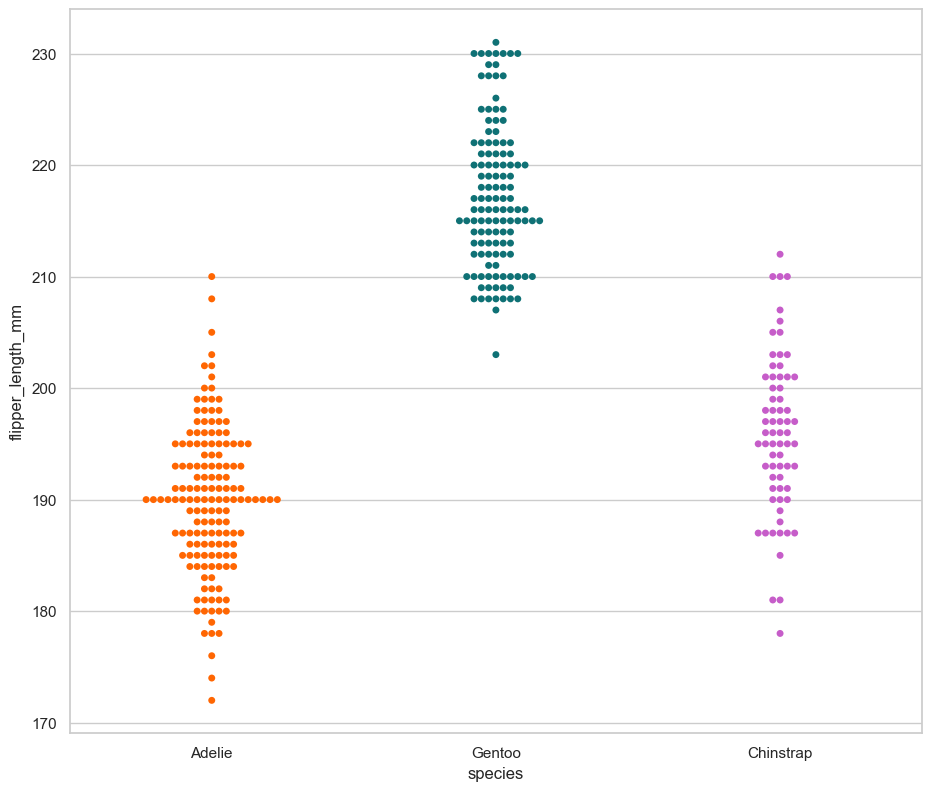

In [78]:
sns.swarmplot(data=preprocessed_penguins_df,
              x='species',
              y='flipper_length_mm',
              hue='species',
              palette=penguin_color)

# Estableciendo relaciones: Matrices de correlación
## ¿Existe una correlación lineal entre alguna de nuestras variables?


In [79]:
numerical_df = processed_penguins_df.select_dtypes(include=[float, int])

numerical_df.corr()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
year                     0.032657      -0.048182           0.151068   

                   body_mass_g      year  
bill_length_mm        0.589451  0.032657  
bill_depth_mm        -0.472016 -0.048182  
flipper_length_mm     0.872979  0.151068  
body_mass_g           1.000000  0.021862  
year                  0.021862  1.000000

## ¿Como puedo visualizar los coeficientes de correlación?


<Axes: >

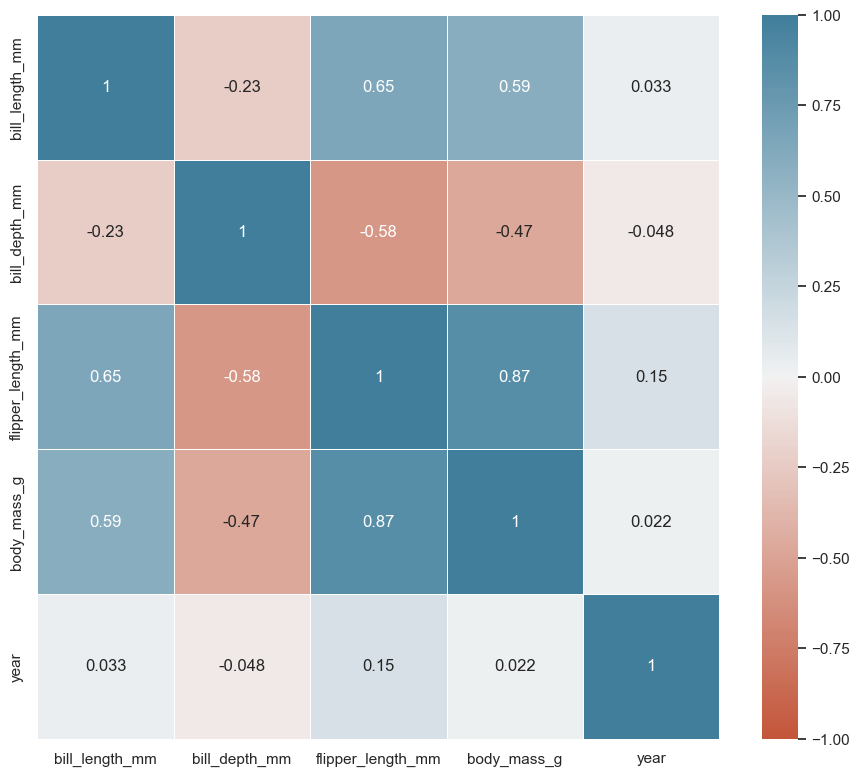

In [80]:
sns.heatmap(
    data=numerical_df.corr(),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True, 
    cmap=sns.diverging_palette(20,230,as_cmap=True)
)

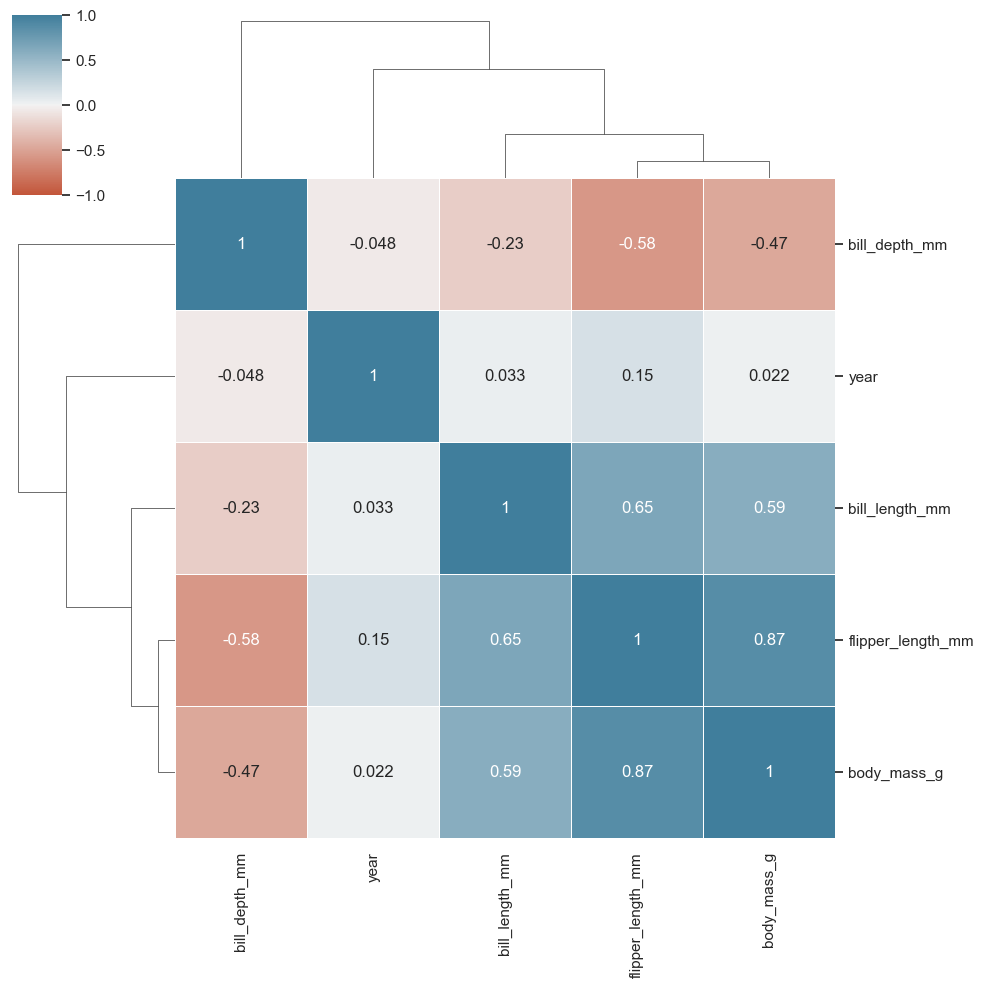

In [81]:
sns.clustermap(
    data=numerical_df.corr(),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True, 
    cmap=sns.diverging_palette(20,230,as_cmap=True)
)

## Cómo podría representar una variable categórica como numérica discreta?

In [82]:
processed_penguins_df=processed_penguins_df.assign(
    numeric_sex=lambda df: df.sex.replace(['female', 'male'], [0,1]).astype(int)
)

In [83]:
numerical_df3 = processed_penguins_df.select_dtypes(include=[float, int])

print(processed_penguins_df.numeric_sex.dtype)

int32


In [84]:
numerical_df3

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0              39.1           18.7              181.0       3750.0  2007   
1              39.5           17.4              186.0       3800.0  2007   
2              40.3           18.0              195.0       3250.0  2007   
4              36.7           19.3              193.0       3450.0  2007   
5              39.3           20.6              190.0       3650.0  2007   
..              ...            ...                ...          ...   ...   
339            55.8           19.8              207.0       4000.0  2009   
340            43.5           18.1              202.0       3400.0  2009   
341            49.6           18.2              193.0       3775.0  2009   
342            50.8           19.0              210.0       4100.0  2009   
343            50.2           18.7              198.0       3775.0  2009   

     numeric_sex  
0              1  
1              0  
2              0  
4              0  
5              1  
..           ...  
339            1  
340            0  
341            1  
342            1  
343            0  

[333 rows x 6 columns]

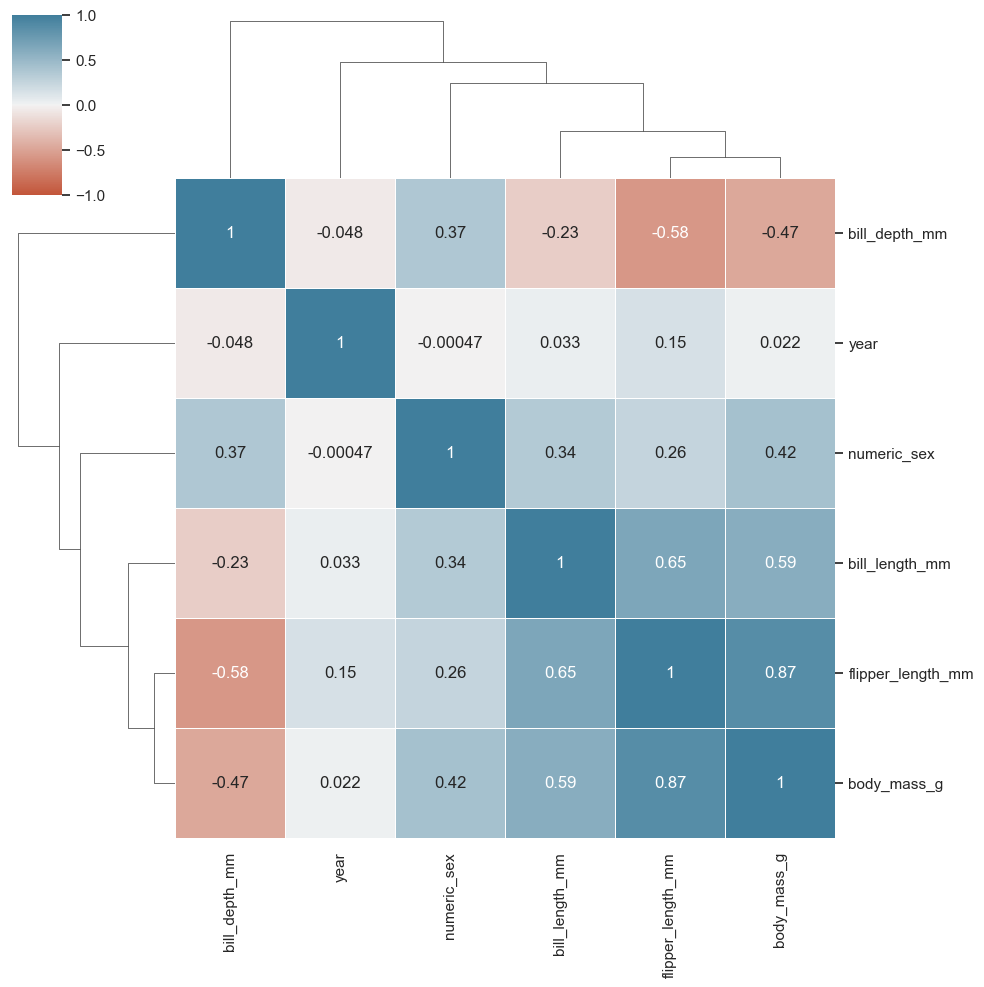

In [85]:
sns.clustermap(
    data=numerical_df3.corr(),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True, 
    cmap=sns.diverging_palette(20,230,as_cmap=True)
)

## ¿Cuál es una límitante de los coeficientes de correlación lineal?
Sólo nos ayuda a determinar la posible existencia de una correlación lineal, sin embargo, su ausencia no significa que no exista otro tipo de correlación


array([[1.        , 0.00269802],
       [0.00269802, 1.        ]])

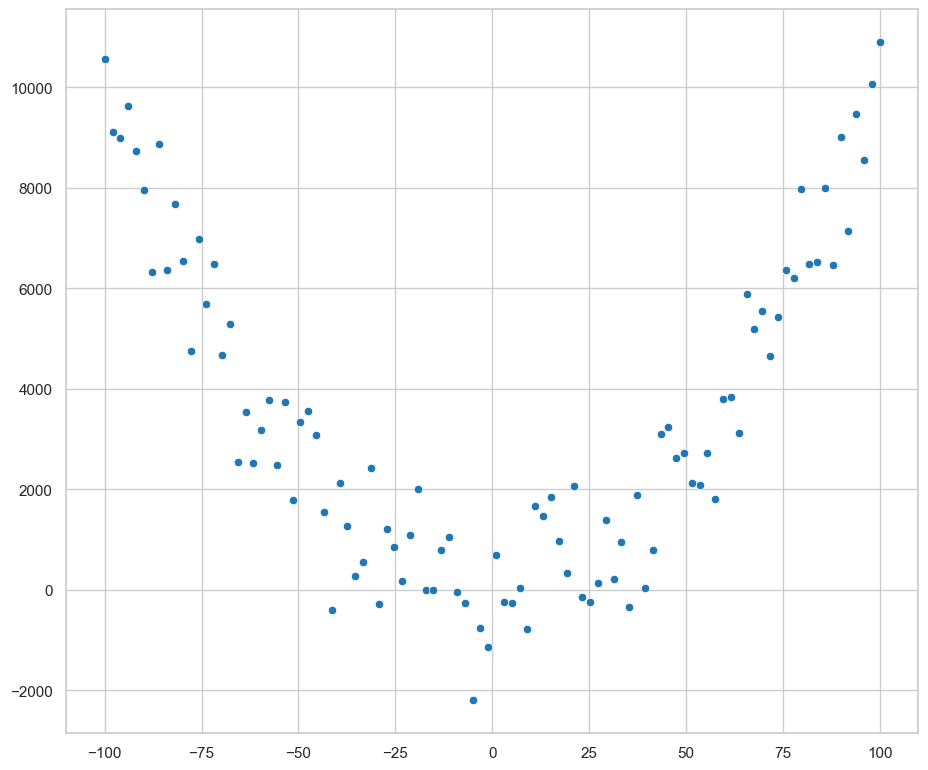

In [86]:
x= np.linspace(-100,100,100)
y=x**2
y+= np.random.normal(0,1000,x.size)
sns.scatterplot(x=x,y=y)


np.corrcoef(x,y)

array([[1.        , 0.91665357],
       [0.91665357, 1.        ]])

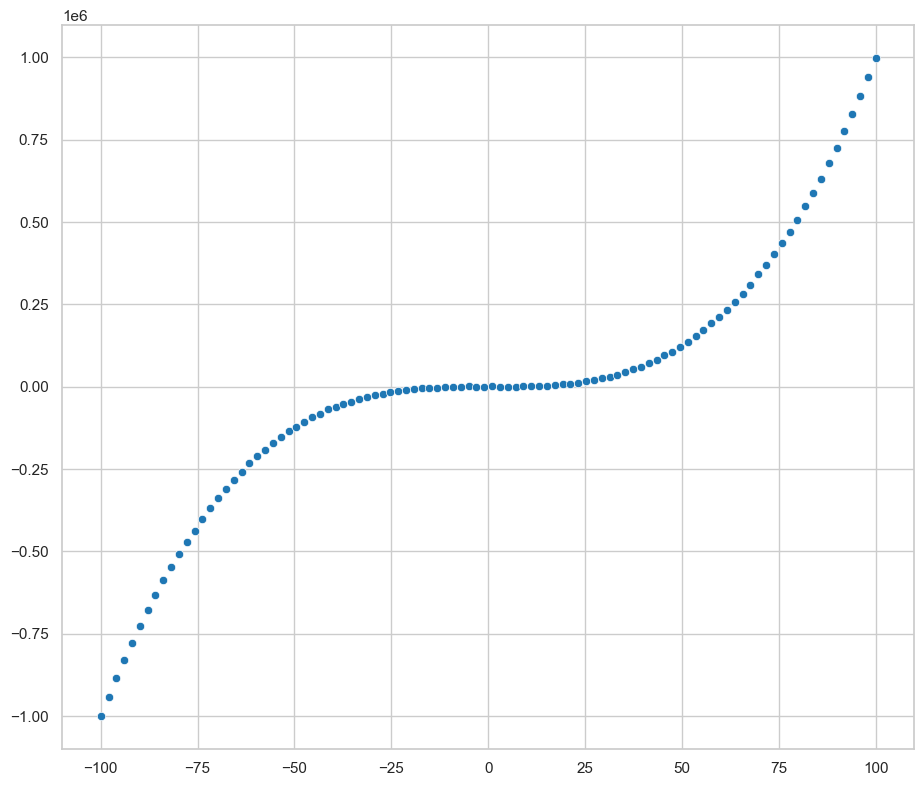

In [87]:
x= np.linspace(-100,100,100)
y=x**3
y+= np.random.normal(0,1000,x.size)
sns.scatterplot(x=x,y=y)


np.corrcoef(x,y)


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

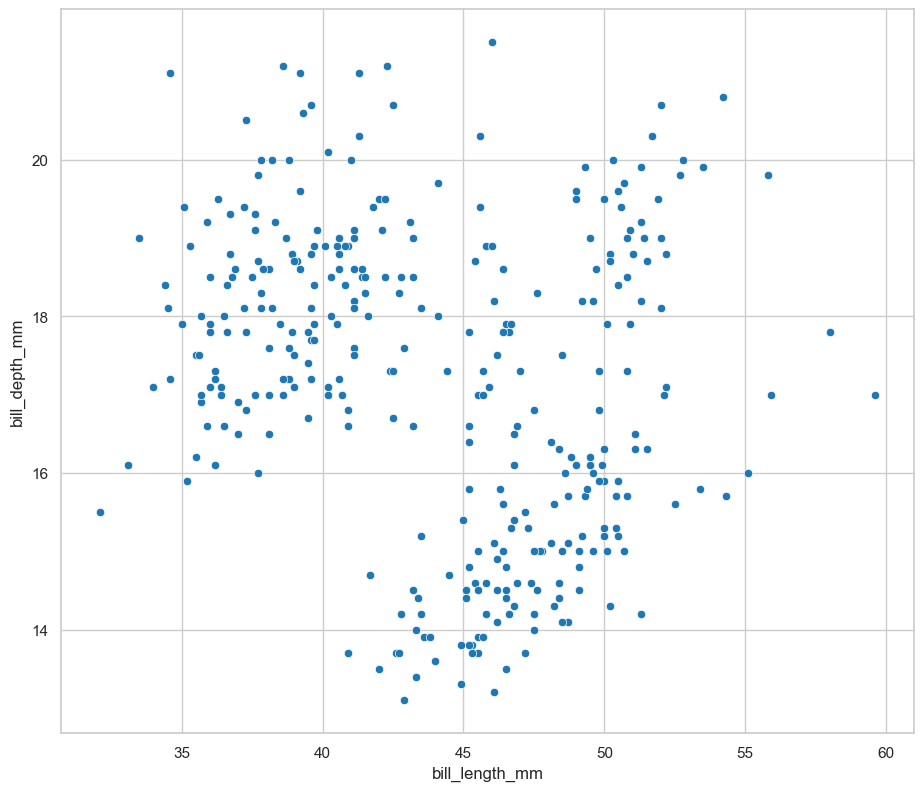

In [88]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
)

In [89]:
#np.corrcoef(processed_penguins_df.bill_length_mm,preprocessed_penguins_df.bill_depth_mm)
datatemp = processed_penguins_df[['bill_length_mm', 'bill_depth_mm']]
datatemp.dropna()
datatemp.corr()

bill_length_mm  bill_depth_mm
bill_length_mm        1.000000      -0.228626
bill_depth_mm        -0.228626       1.000000

# El coeficiente de correlación no nos habla del impacto de la relación


[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


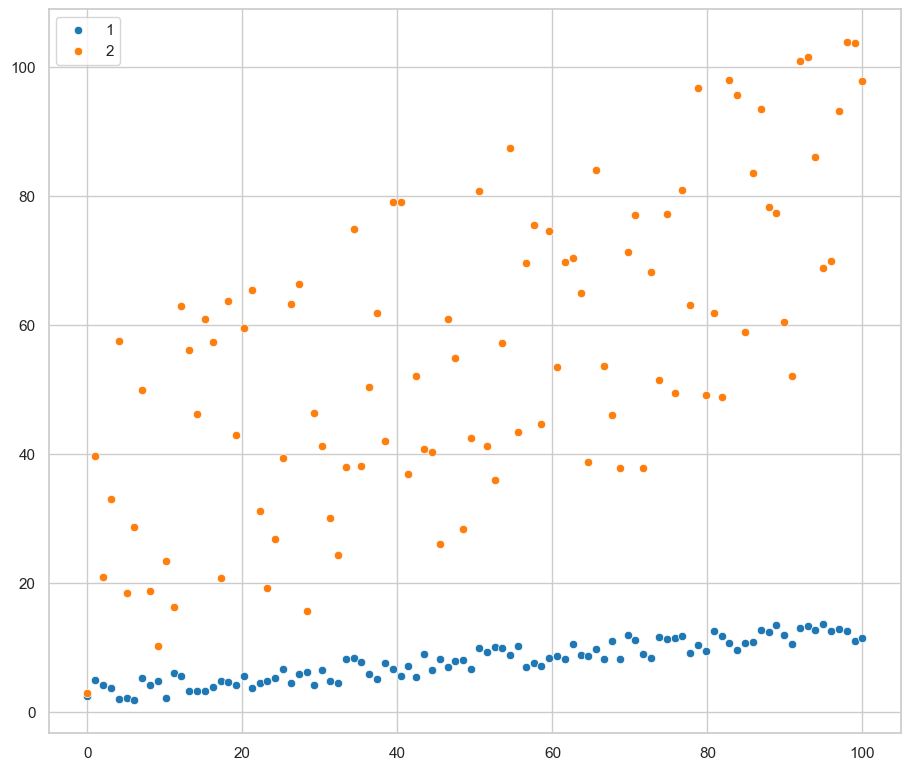

In [90]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

# Estableciendo relaciones: Análisis de regresión simple


In [91]:
res1=scipy.stats.linregress(x=x_1, y=y_1)
res2=scipy.stats.linregress(x=x_2, y=y_2)
print(res1, res2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


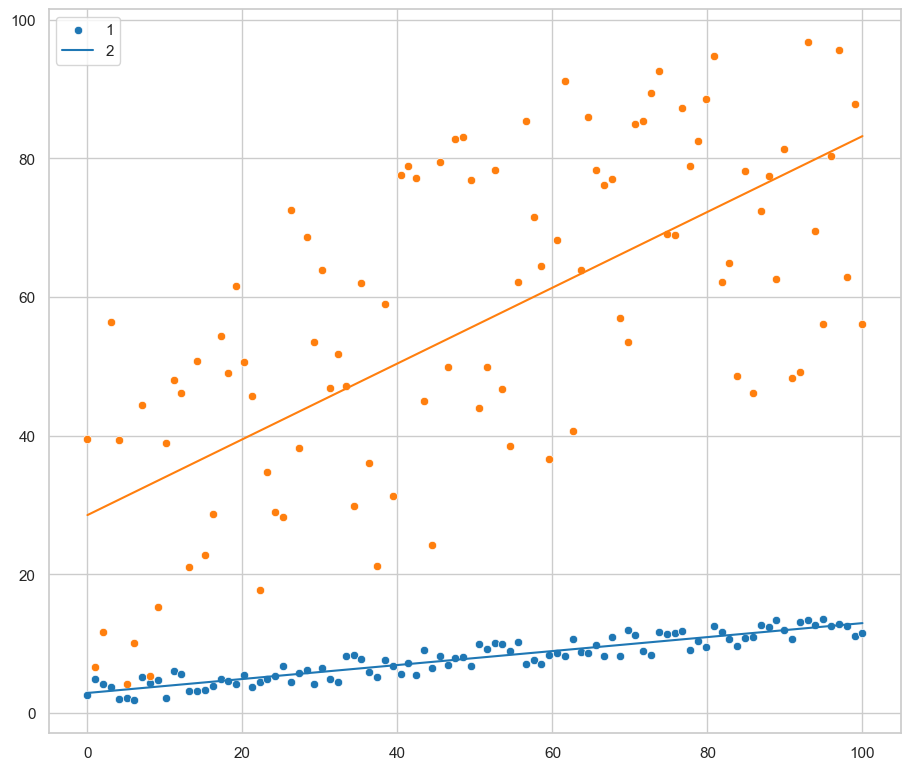

In [92]:

sns.scatterplot(
    x=x_1,
    y=y_1
)
fx_1 = np.array([x_1.min(),x_1.max()])
fy_1 = res1.intercept + res1.slope * fx_1
plt.plot(fx_1,fy_1)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)


sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(),x_2.max()])
fy_2 = res2.intercept + res2.slope * fx_2
plt.plot(fx_2,fy_2)
plt.legend(labels=['1', '2'])



LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


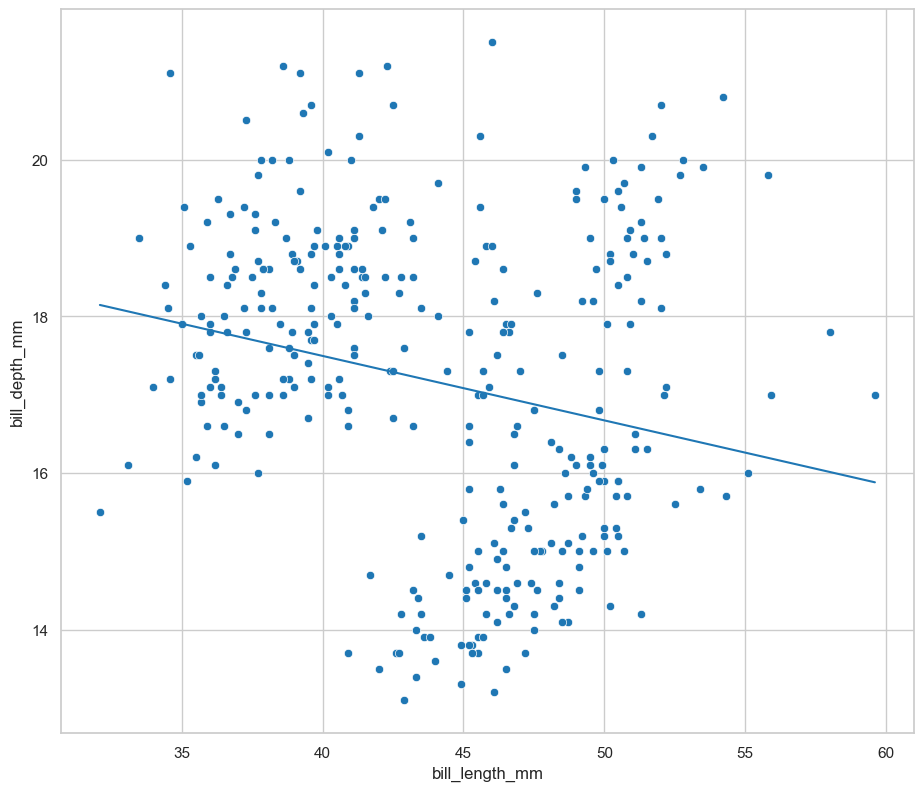

In [93]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)
res_penguins = scipy.stats.linregress(
    x=processed_penguins_df.bill_length_mm,
    y=processed_penguins_df.bill_depth_mm
)
print(res_penguins)
fx_3 = np.array([processed_penguins_df.bill_length_mm.min(),processed_penguins_df.bill_length_mm.max()])
fy_3 = res_penguins.intercept + res_penguins.slope * fx_3
plt.plot(fx_3,fy_3)


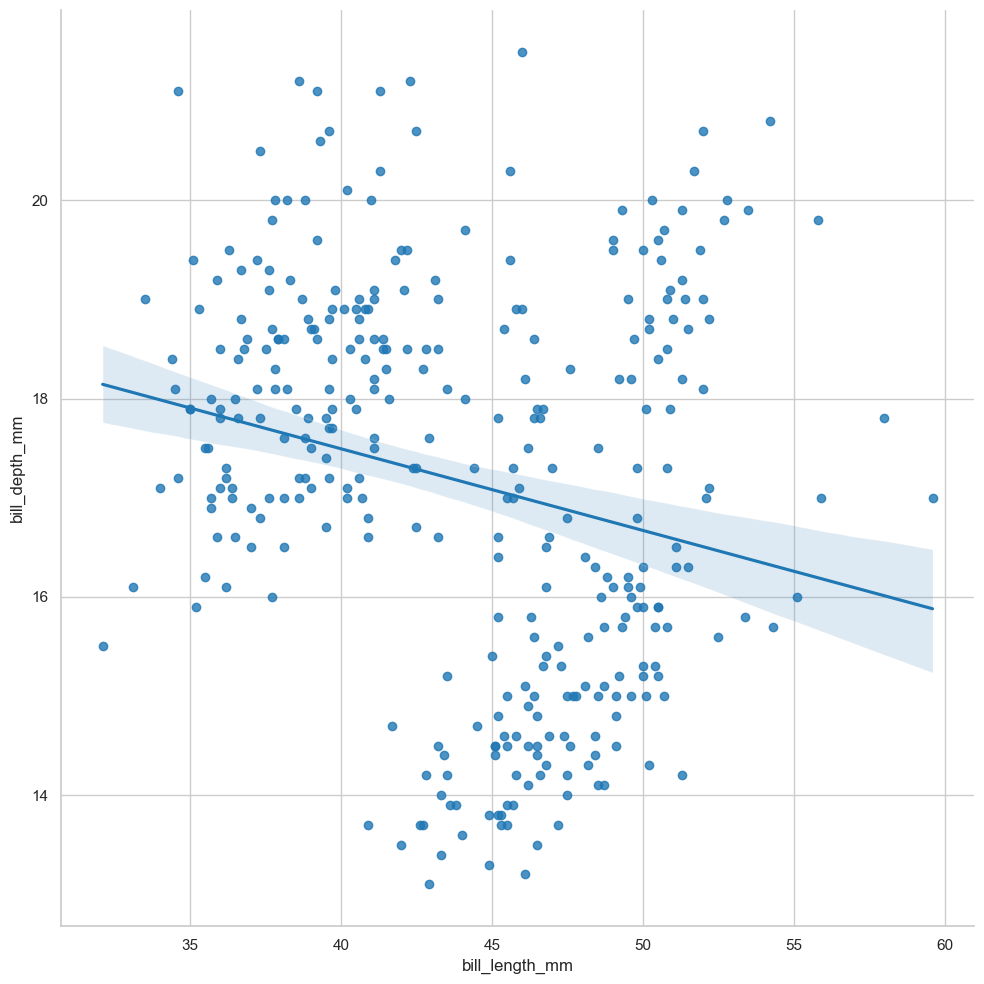

In [94]:
sns.lmplot(data=processed_penguins_df,
           x='bill_length_mm',
           y='bill_depth_mm',
           height=10,
           )

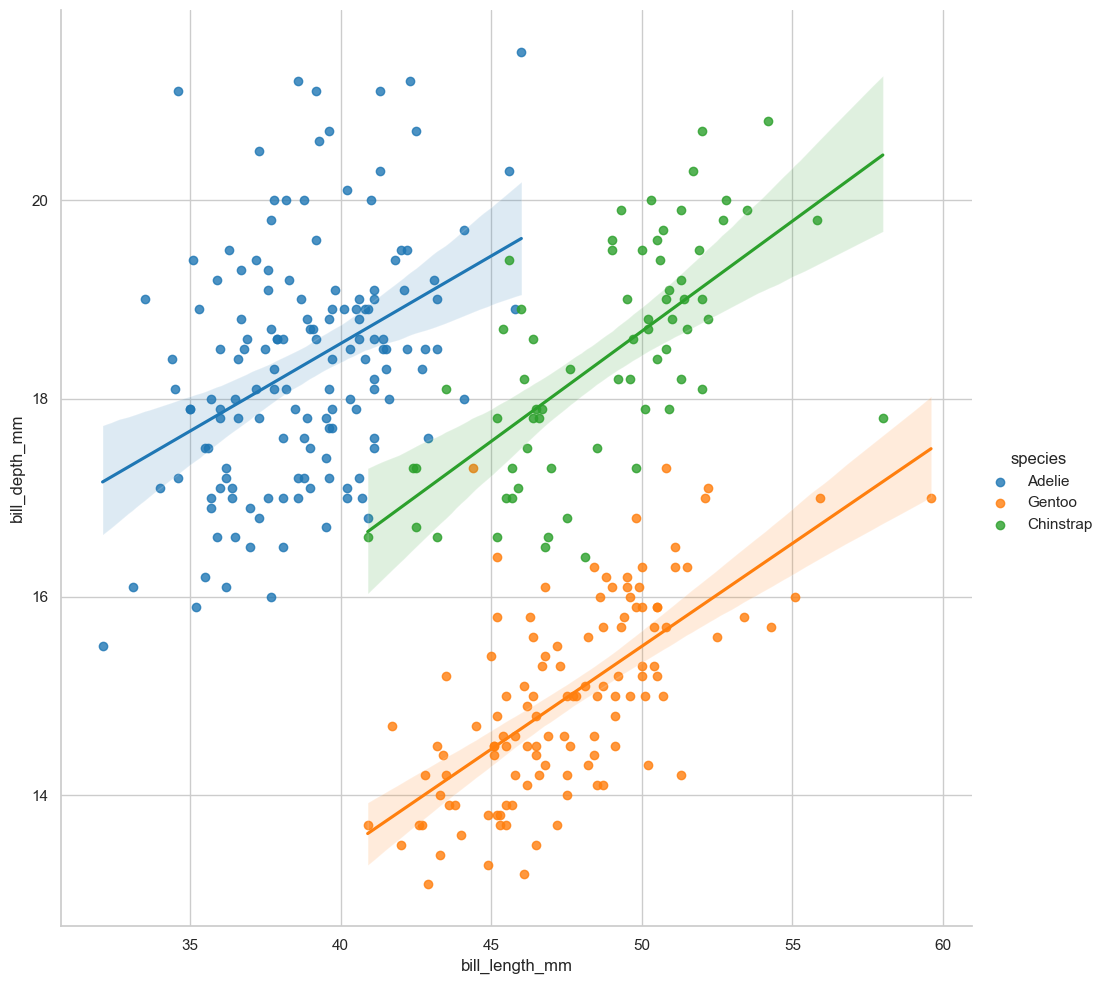

In [95]:
sns.lmplot(data=processed_penguins_df,
           x='bill_length_mm',
           y='bill_depth_mm',
           height=10,
           hue='species'
           )

## Limitaciones del análisis de regresión simple
**La regresión lineal simple no es simétrica**


In [96]:
x=processed_penguins_df.bill_length_mm
y=processed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x,y=y)

res_y_x = scipy.stats.linregress(x=y,y=x)

print(res_x_y, res_y_x, sep='\n')


LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195025, intercept=54.89085424504756, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


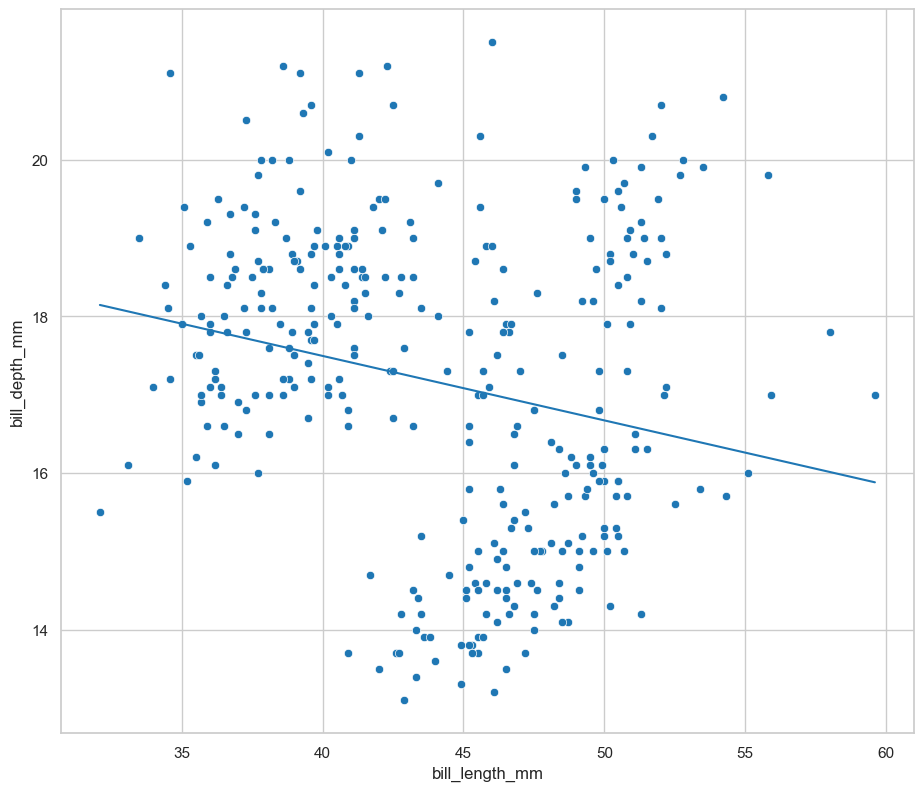

In [97]:
#clase grafica 1

sns.scatterplot( x=x, y=y )

fx_1= np.array([x.min(), x.max()]) 
fy_1= res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1);

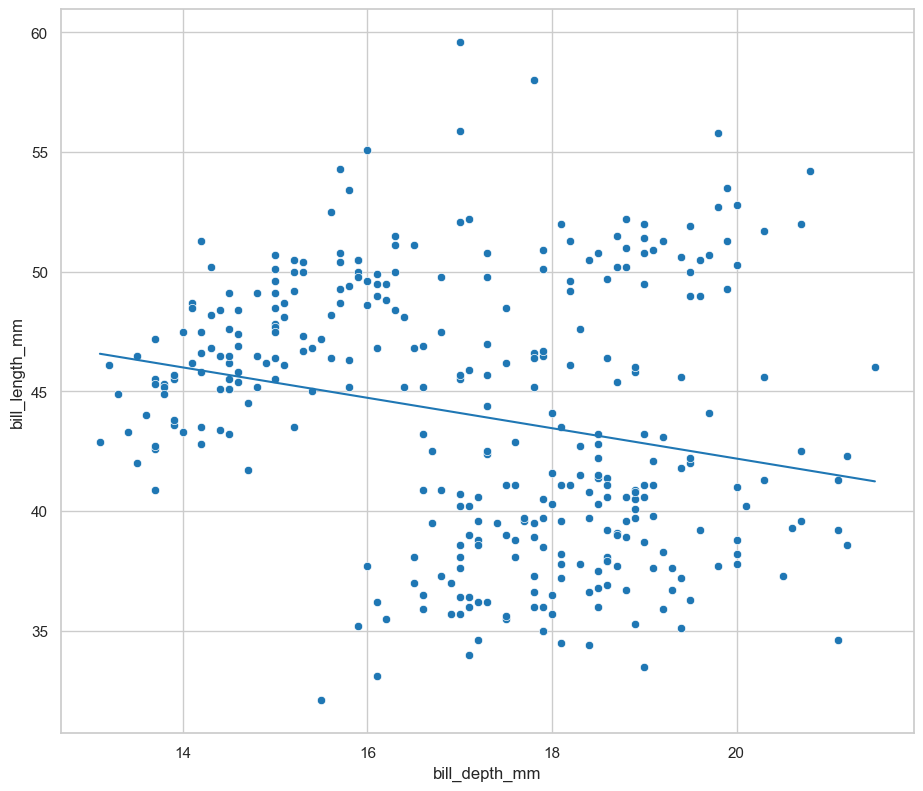

In [98]:
#grafica 2

sns.scatterplot( x=y, y=x )

fx_2= np.array([y.min(), y.max()]) 
fy_2= res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2);

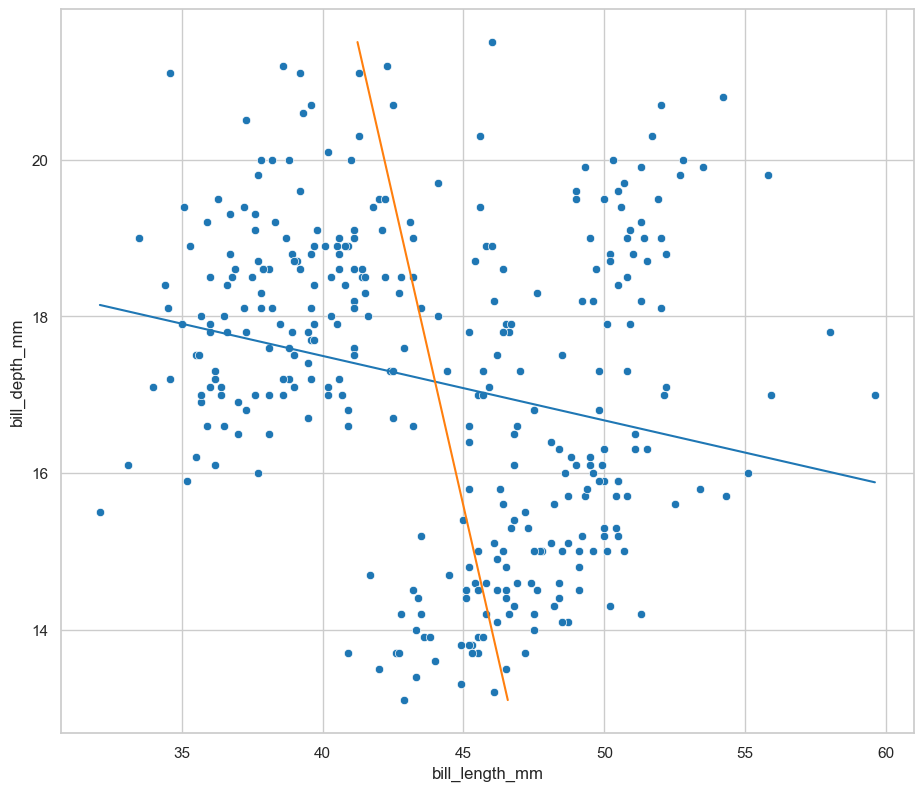

In [99]:
#grafica 3

sns.scatterplot( x=x, y=y ) 
plt.plot(fx_1, fy_1) 
plt.plot(fy_2, fx_2);

In [100]:
## Otro conjunto de variables

In [101]:
x4=processed_penguins_df.body_mass_g
y4=processed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x4,y=y4)

res_y_x = scipy.stats.linregress(x=y4,y=x4)

print(res_x_y, res_y_x, sep='\n')

LinregressResult(slope=-0.0011543613215933162, intercept=22.02132880926774, rvalue=-0.47201566019513935, pvalue=7.024160153242164e-20, stderr=0.00011850538842362127, intercept_stderr=0.5075816193349794)
LinregressResult(slope=-193.006105888868, intercept=7519.980782733275, rvalue=-0.47201566019513935, pvalue=7.024160153242164e-20, stderr=19.81378197505895, intercept_stderr=342.3250620783768)


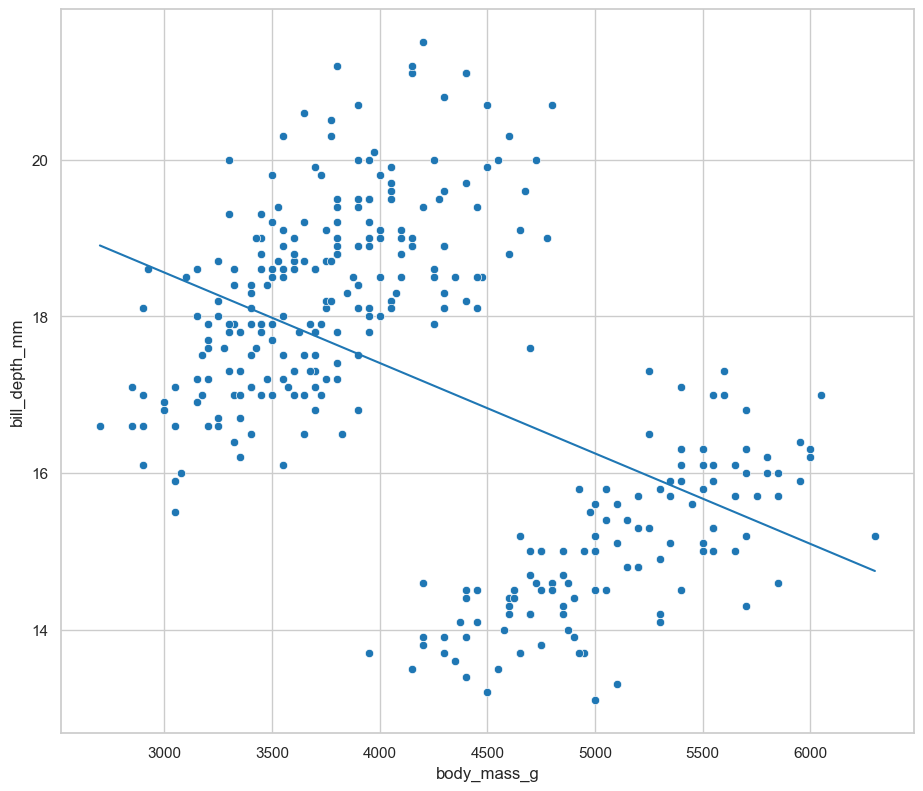

In [102]:
#clase grafica 1

sns.scatterplot( x=x4, y=y4 )

fx_4= np.array([x4.min(), x4.max()]) 
fy_4= res_x_y.intercept + res_x_y.slope * fx_4

plt.plot(fx_4, fy_4);

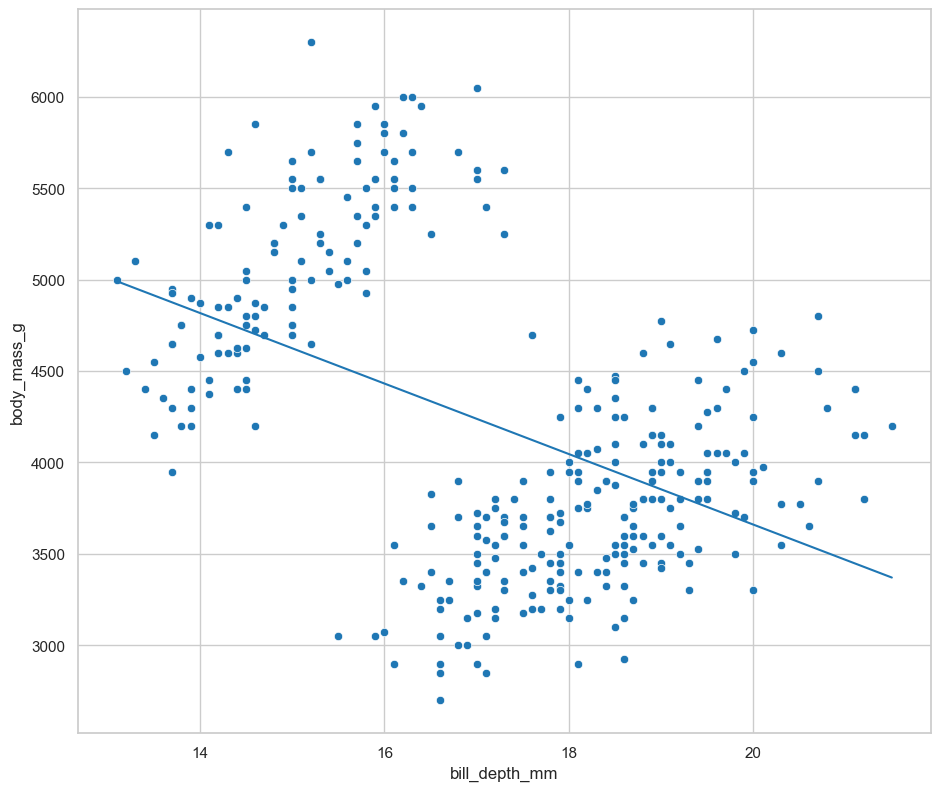

In [103]:
#grafica 2

sns.scatterplot( x=y4, y=x4 )

fx_5= np.array([y4.min(), y4.max()]) 
fy_5= res_y_x.intercept + res_y_x.slope * fx_5

plt.plot(fx_5, fy_5)

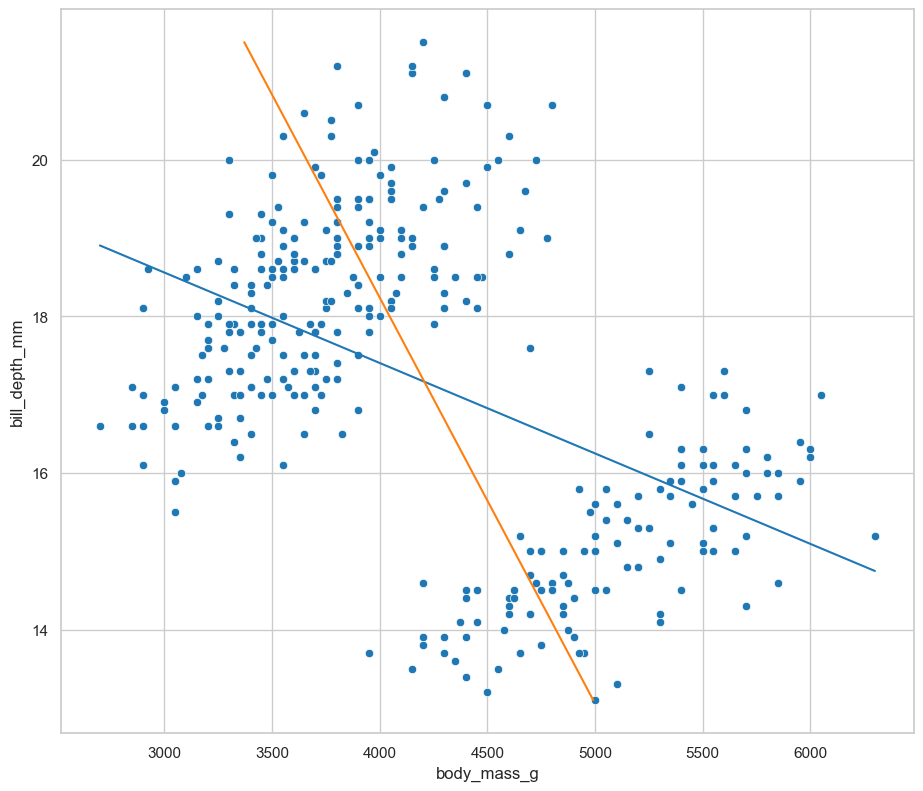

In [104]:
#grafica 3

sns.scatterplot( x=x4, y=y4 ) 
plt.plot(fx_4, fy_4) 
plt.plot(fy_5, fx_5);

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre varias variables


In [105]:
smf.ols(
    formula='bill_length_mm ~ bill_depth_mm',
    data=processed_penguins_df
).fit().params

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [106]:
smf.ols(
    formula='bill_depth_mm ~ bill_length_mm',
    data=processed_penguins_df
).fit().params

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

# **Análisis de regresión múltiple**

## Olvidé mi báscula para pesar a los pingüinos, ¿Cuál sería la mejor forma de capturar ese dato?

**Creando modelos**

** Modelo 1 **

In [107]:
model_1=(
    smf.ols(formula='body_mass_g ~ bill_length_mm',
            data=processed_penguins_df
            ).fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.54e-32
Time:                        21:31:27   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Modelo 2**

In [108]:
model_2=(
    smf.ols(formula='body_mass_g ~ bill_length_mm+bill_depth_mm',
            data=processed_penguins_df
            ).fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           7.04e-46
Time:                        21:31:27   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Modelo 3**

In [109]:
model_3=(
    smf.ols(formula='body_mass_g ~ bill_length_mm+bill_depth_mm+flipper_length_mm',
            data=processed_penguins_df
            ).fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          9.26e-103
Time:                        21:31:27   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Modelo 4**

In [110]:
model_4=(
    smf.ols(formula='body_mass_g ~ bill_length_mm+bill_depth_mm+flipper_length_mm+C(sex)',
            data=processed_penguins_df
            ).fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          6.28e-122
Time:                        21:31:27   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Modelo 5**

In [111]:
model_5=(
    smf.ols(formula='body_mass_g ~ flipper_length_mm + C(sex)',
            data=processed_penguins_df
            ).fit()
)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          3.53e-118
Time:                        21:31:27   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualizando resultados


**Creacion de tablas de resultado**

In [112]:
models_results=pd.DataFrame(
    dict(
        actual_value=processed_penguins_df.body_mass_g,
        prediction_model_1=model_1.predict(),
        prediction_model_2=model_2.predict(),
        prediction_model_3=model_3.predict(),
        prediction_model_4=model_4.predict(),
        prediction_model_5=model_5.predict(),
        species=processed_penguins_df.species,
        sex=processed_penguins_df.sex
    )
)

(array([ 6., 20., 58., 52., 46., 45., 41., 19., 27., 19.]),
 array([2670.63391868, 2982.61377803, 3294.59363737, 3606.57349671,
        3918.55335605, 4230.53321539, 4542.51307474, 4854.49293408,
        5166.47279342, 5478.45265276, 5790.4325121 ]),
 <BarContainer object of 10 artists>)

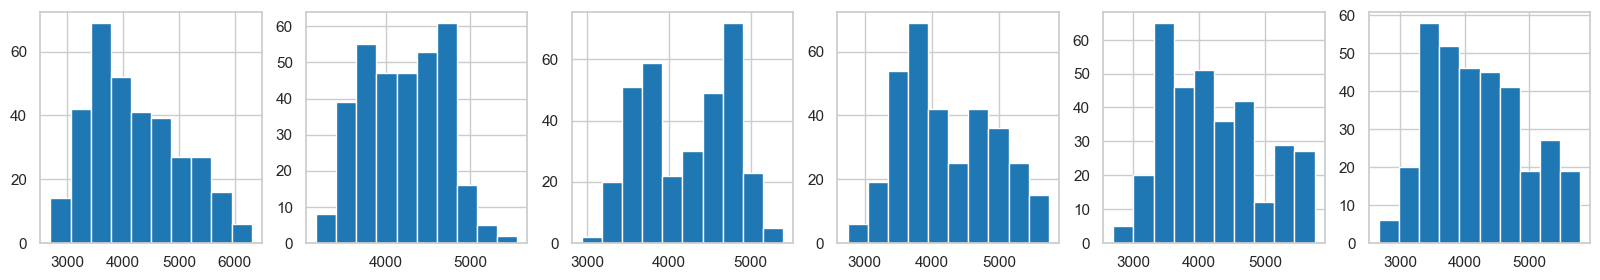

In [113]:
fig,axs = plt.subplots(1,6, figsize=(20,3))
axs[0].hist(models_results.actual_value,bins=10)
axs[1].hist(models_results.prediction_model_1,bins=10)
axs[2].hist(models_results.prediction_model_2,bins=10)
axs[3].hist(models_results.prediction_model_3,bins=10)
axs[4].hist(models_results.prediction_model_4,bins=10)
axs[5].hist(models_results.prediction_model_5,bins=10)


**ECDFs**

<Axes: ylabel='Proportion'>

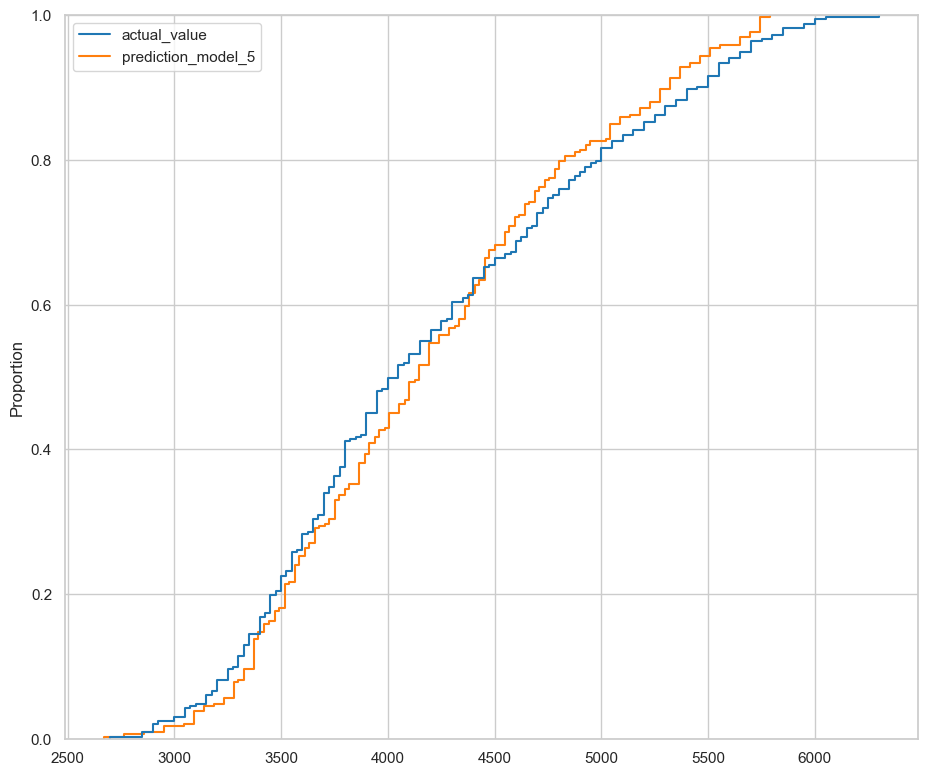

In [114]:
sns.ecdfplot(
    data=models_results.select_columns(['actual_value', 'prediction_model_5'])
)

**PDF densidades**

<Axes: ylabel='Density'>

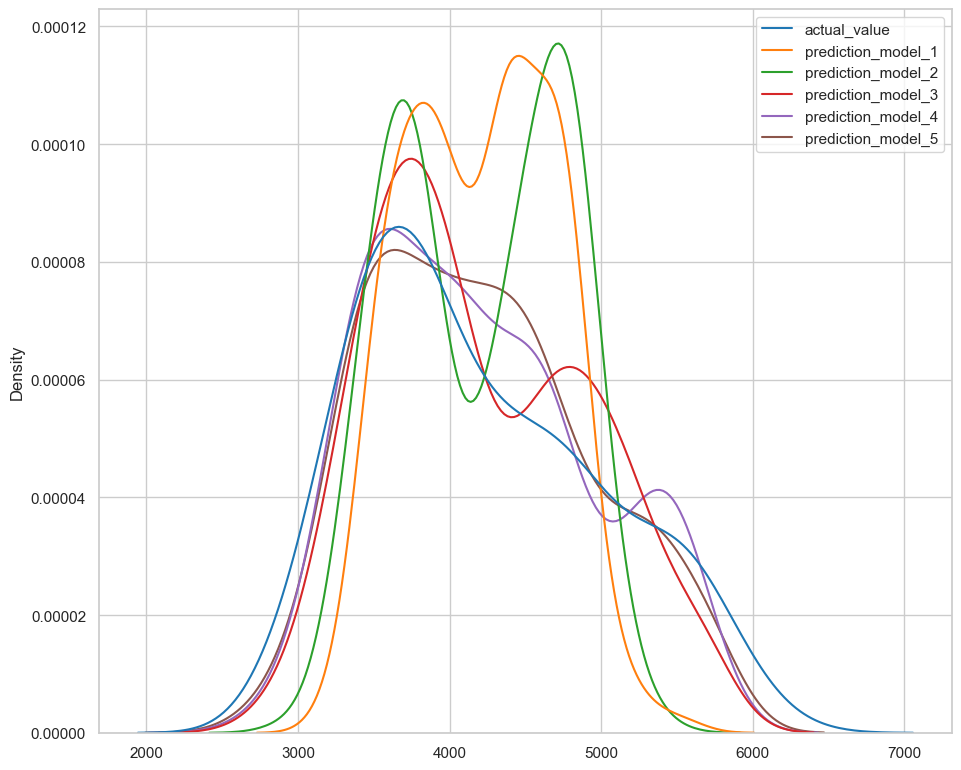

In [115]:
sns.kdeplot(
    data=models_results
)

<Axes: ylabel='Density'>

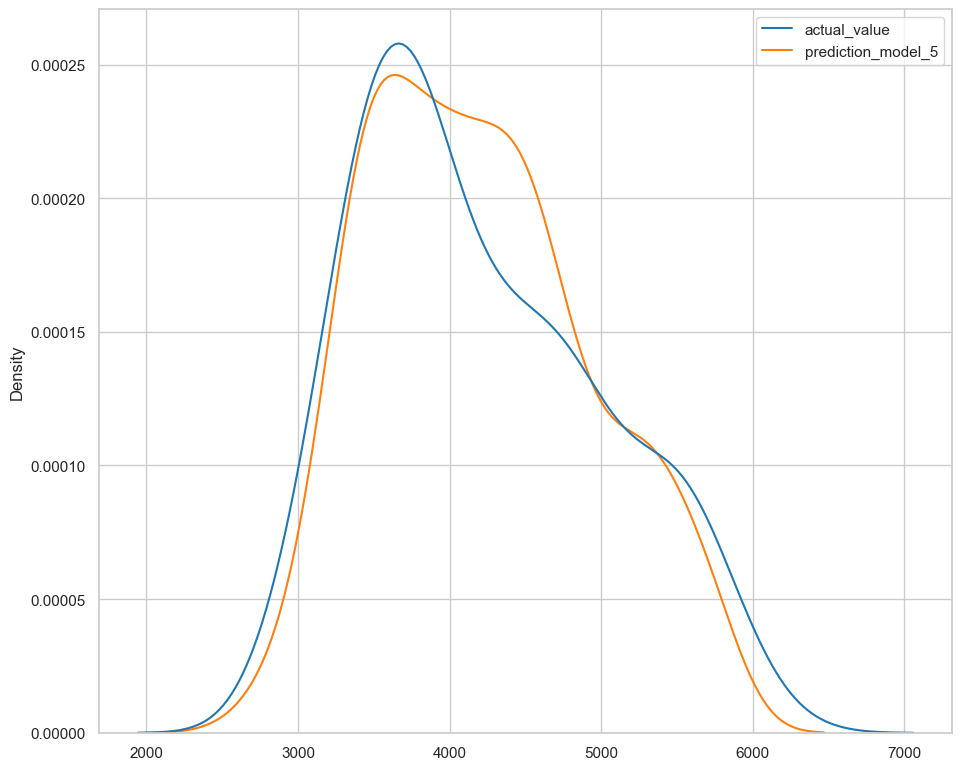

In [116]:
sns.kdeplot(
    data=models_results.select_columns(['actual_value', 'prediction_model_5'])
)

<Axes: ylabel='Density'>

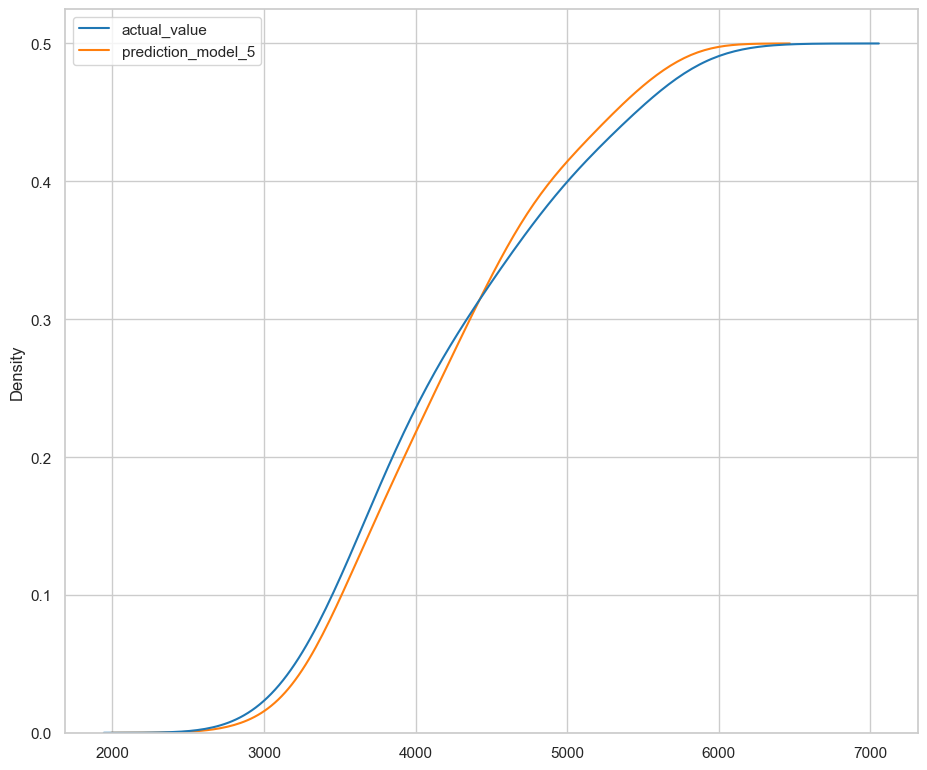

In [117]:
sns.kdeplot(
    data=models_results.select_columns(['actual_value', 'prediction_model_5']),
    cumulative=True
)

# **¿Que podemos haber encontrado antes de hacer los modelos?**

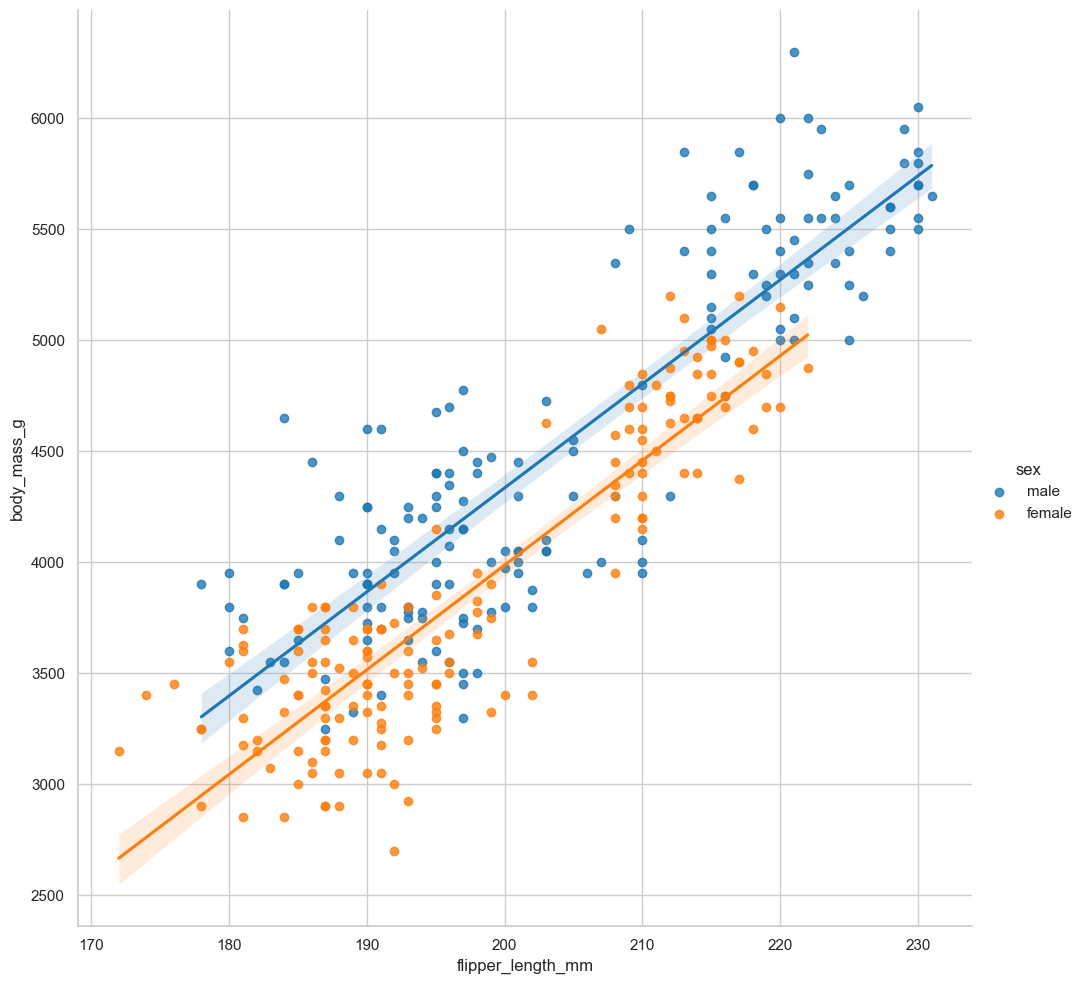

In [118]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

## personal complemento

In [119]:
temp_male = processed_penguins_df[processed_penguins_df['sex'] == 'male']
model_6=(
    smf.ols(formula='body_mass_g ~ bill_length_mm+bill_depth_mm+flipper_length_mm+C(sex)',
            data=temp_male
            ).fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          6.28e-122
Time:                        21:31:30   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
models_results_temp=pd.DataFrame(
    dict(
        actual_value=temp_male.body_mass_g,
        prediction_model_6=model_6.predict(),
           )
)

<Axes: ylabel='Density'>

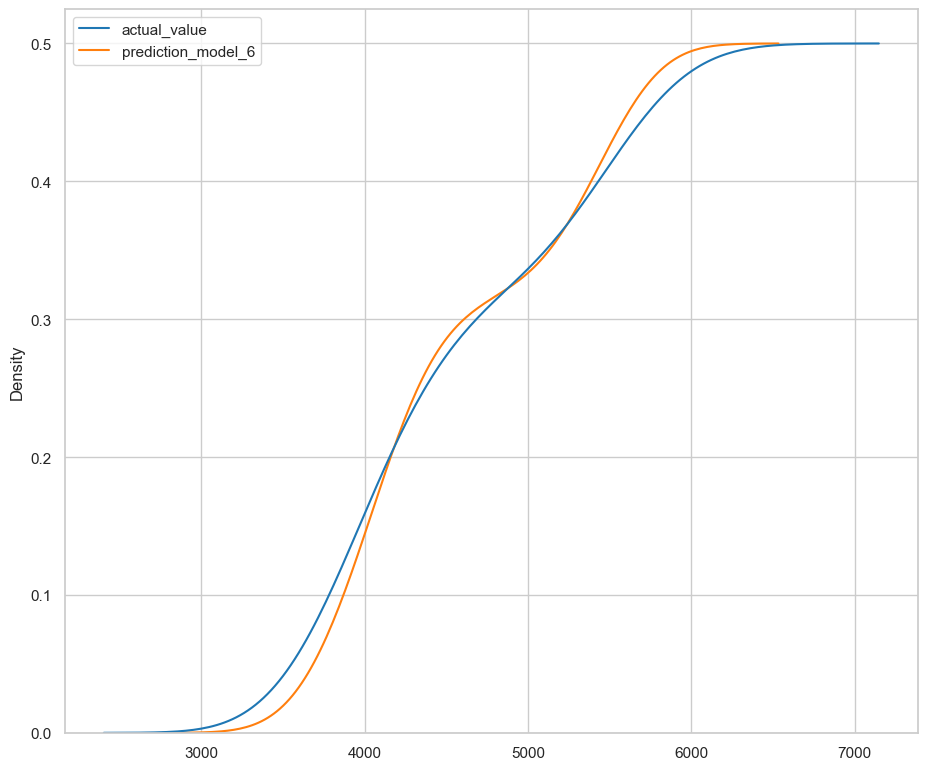

In [121]:
sns.kdeplot(
    data=models_results_temp.select_columns(['actual_value', 'prediction_model_6']),
    cumulative=True
)

# Análisis de regresión logística
## Podemos crear un modelo que nos ayude a definir si un modelo en macho o hembra?

In [123]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm +C(island)',
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.618020
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      328
Method:                           MLE   Df Model:                            4
Date:                Fri, 21 Jun 2024   Pseudo R-squ.:                  0.1083
Time:                        21:46:12   Log-Likelihood:                -205.80
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 3.598e-10
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -10.8554      2.537     -4.279      0.000     -15.827      -5.884
C(island)[T.Dream]         0.5361      0.356      1.508      0.132      -0.161       1.233
C(island)[T.Torgersen]     1.1689      0.413      2.828      0.005       0.359       1.979
flipper_length_mm          0.0246      0.015      1.613      0.107      -0.005       0.054
bill_length_mm             0.1263      0.033      3.780      0.000       0.061       0.192
==========================================================================================
"""

In [124]:
processed_penguins_df.value_counts(['island','sex']).reset_index(name='count')

island     sex  count
0     Biscoe    male     83
1     Biscoe  female     80
2      Dream    male     62
3      Dream  female     61
4  Torgersen  female     24
5  Torgersen    male     23

## Podemos definir un modelo que nos ayude a identificar si un pinguino pertenece a determinada especie?

In [153]:
processed_penguins_df_gentoo=(
    preprocessed_penguins_df.assign(is_gentoo=lambda df:df.species.replace(['Adelie','Gentoo', 'Chinstrap'],[0,1,0]))
)

processed_penguins_df_gentoo['is_gentoo'] = processed_penguins_df_gentoo['is_gentoo'].astype(int)

In [154]:
model_is_gentoo =smf.logit(
    formula='is_gentoo ~ flipper_length_mm + C(sex)',
    data=processed_penguins_df_gentoo
).fit()

model_is_gentoo.params

Optimization terminated successfully.
         Current function value: 0.029010
         Iterations 12


Intercept           -183.834209
C(sex)[T.male]        -6.907611
flipper_length_mm      0.904854
dtype: float64

In [171]:

processed_penguins_df_gentoo.reset_index(drop=True, inplace=True) 
predictive_value = model_is_gentoo.predict(processed_penguins_df_gentoo).round()

print(len(processed_penguins_df_gentoo), len(predictive_value))  # Asegúrate de que tengan la misma longitud

is_gentoo_df_predictions = pd.DataFrame({
    'actual_gentoo': processed_penguins_df_gentoo['is_gentoo'],
    'predictive_value': predictive_value
})
is_gentoo_df_predictions.dropna().value_counts(['actual_gentoo','predictive_value']).reset_index(name='count')

344 344


actual_gentoo  predictive_value  count
0              0               0.0    213
1              1               1.0    116
2              1               0.0      3
3              0               1.0      1

In [174]:
is_gentoo_df_predictions = is_gentoo_df_predictions.dropna(subset=['predictive_value'])
print(
    sklearn.metrics.confusion_matrix(
        is_gentoo_df_predictions.actual_gentoo,
        is_gentoo_df_predictions.predictive_value
    )
)

sklearn.metrics.accuracy_score(
    is_gentoo_df_predictions.actual_gentoo,
    is_gentoo_df_predictions.predictive_value
)

[[213   1]
 [  3 116]]


0.987987987987988

# Paradoja de Simpson


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

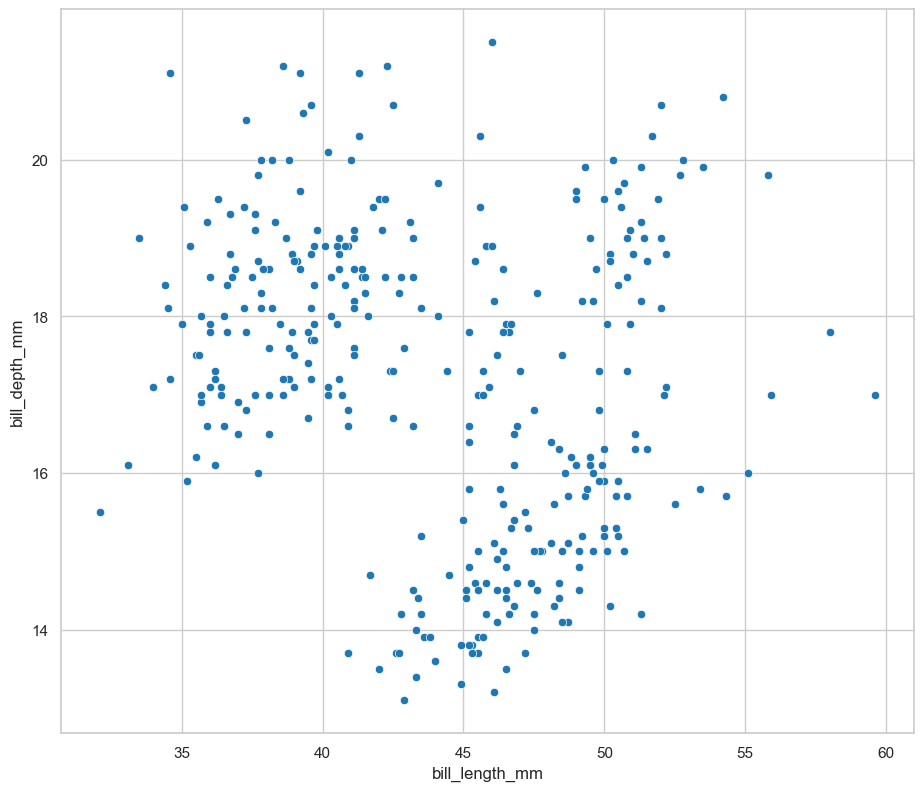

In [175]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

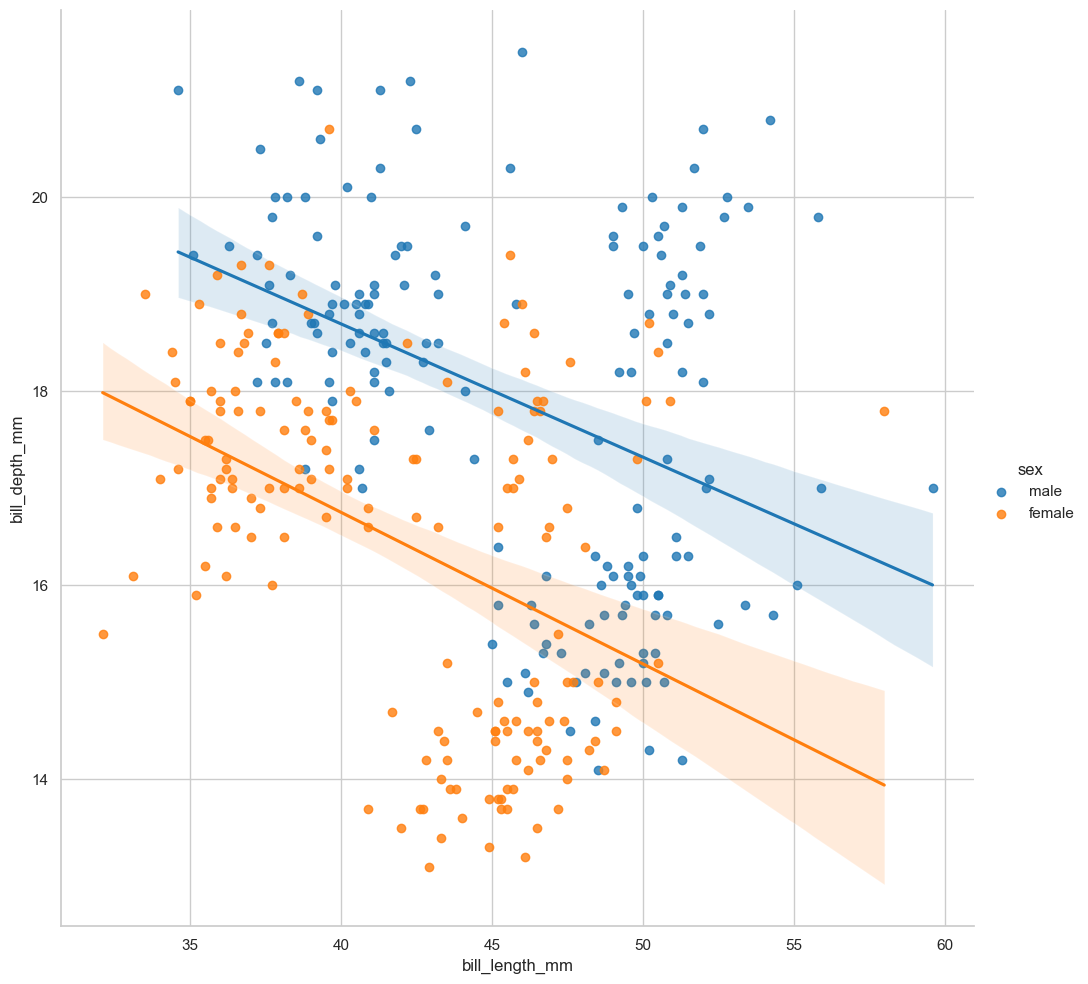

In [188]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',,
    height=10
)

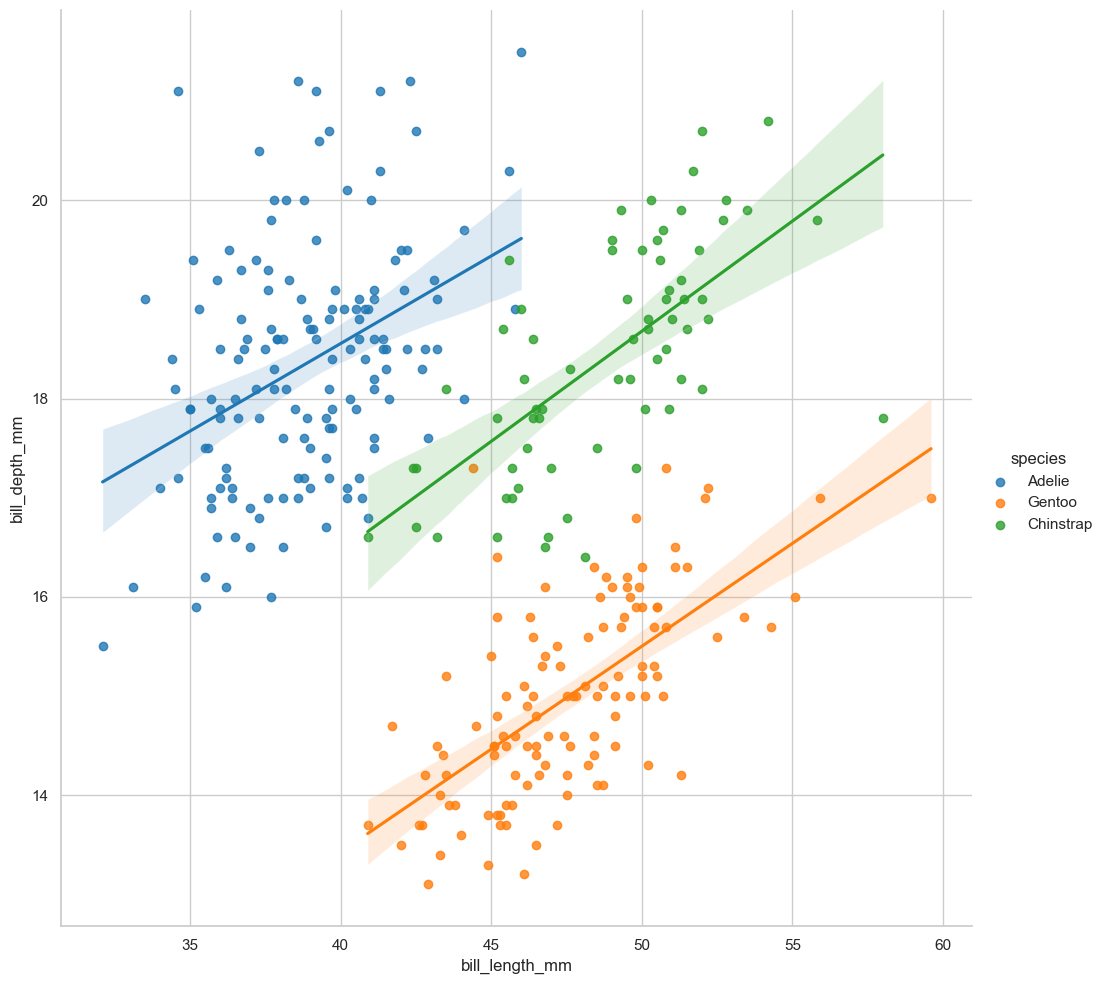

In [191]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10
)

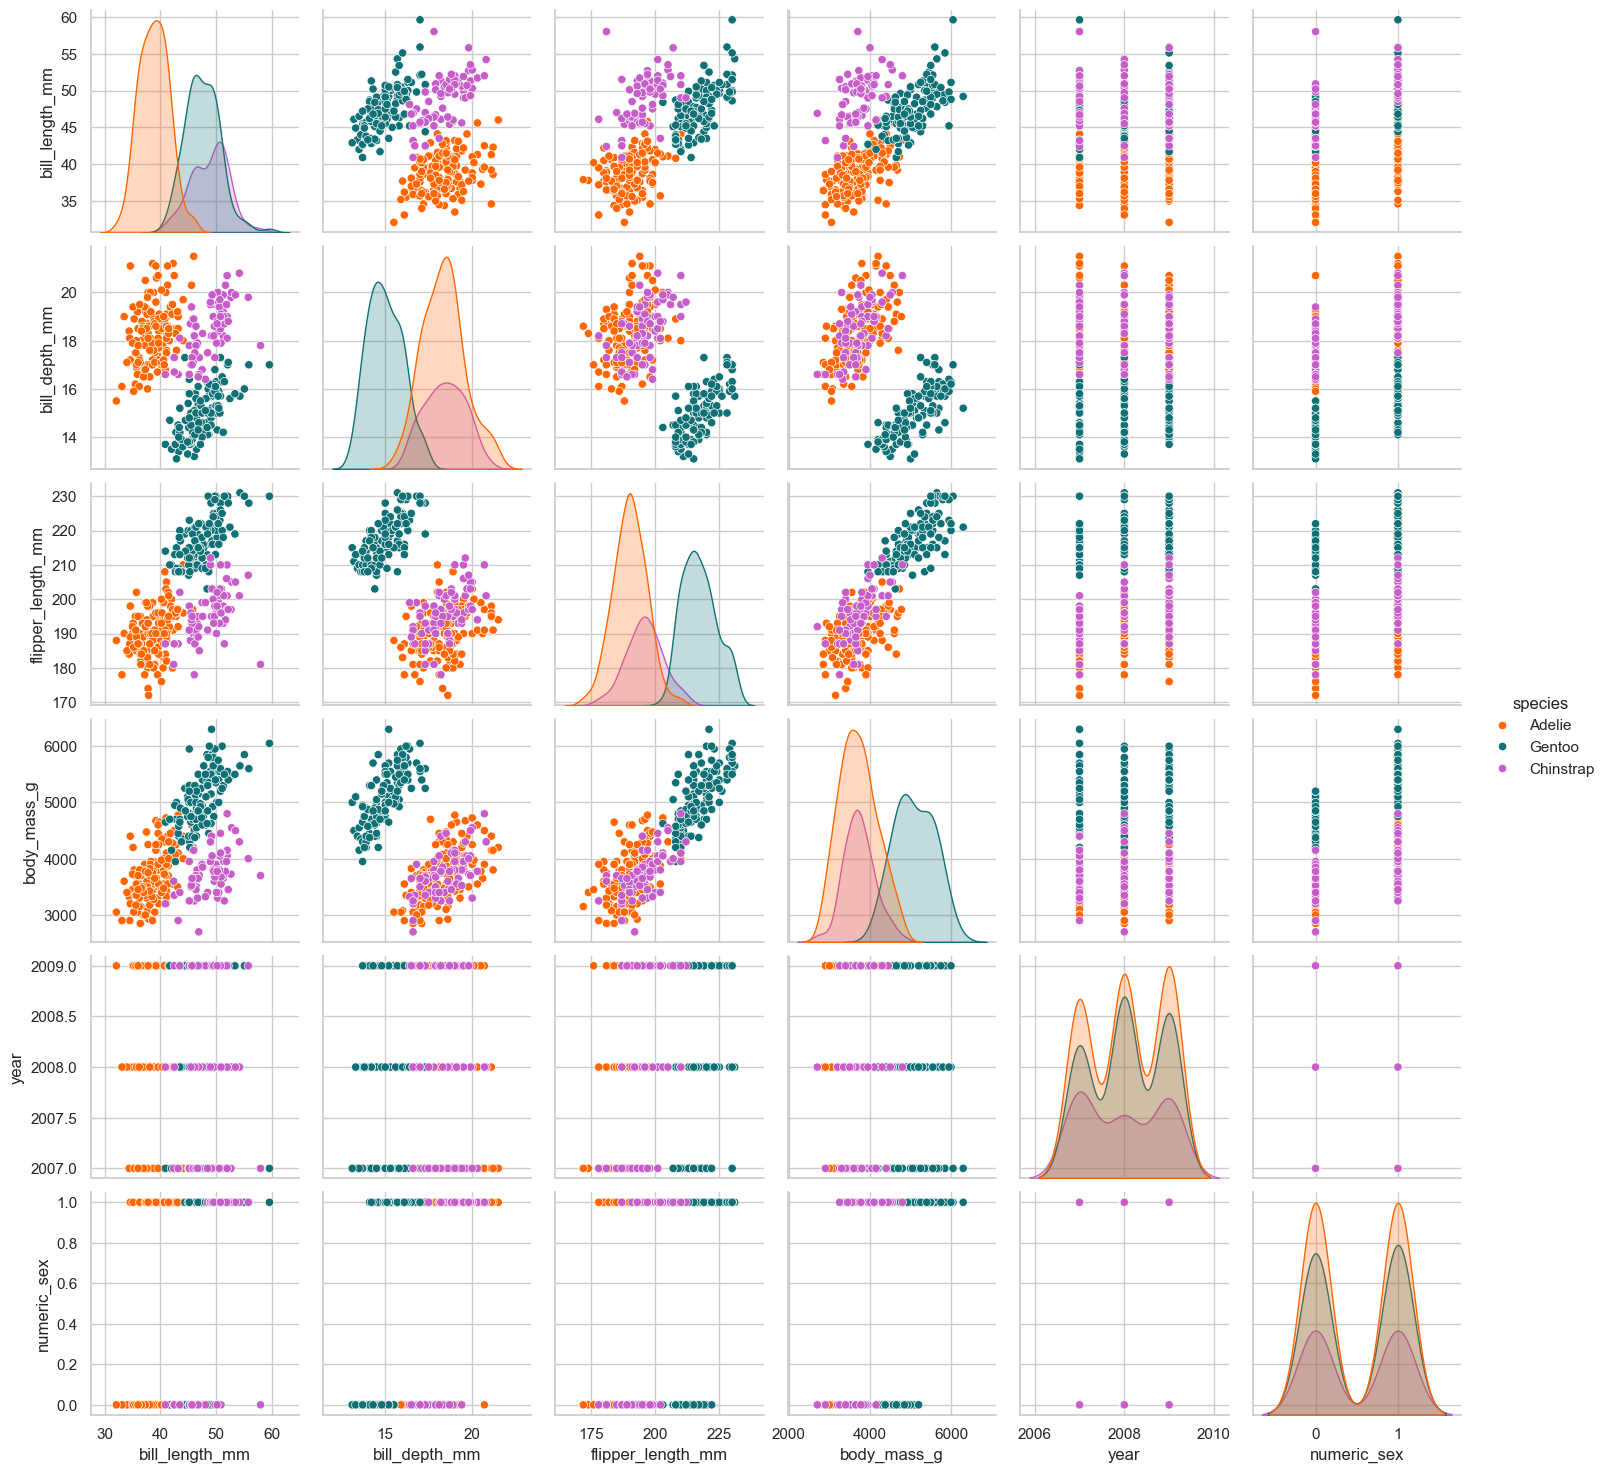

In [178]:
sns.pairplot(data=processed_penguins_df, hue='species', palette=penguin_color)


# Herramientas para el analisis de muchas variables de una manera reducida entregando una **"reducion de dimensiones"**

* Analisis de componente principales (PCA)


* TSNE (T-distributed Stochastic Neighbor Embeding)


* UMAP - Uniform manifold approximation  and Projection for dimension reduction

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2735096/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2735096/

# DETALLES DE AYUDA

Ver imagen 'imagen ayuda 1'


* Las preguntas son la fuente de toda exploracion
* es fundamental identificar el tipo de datos y variables
* visualizar los estadisticos
* visualiza de una o varia formas los datos y variables




## ademas
* nuevos datos
* nuevos estudios estadisticos
* crear mas graficos
* comunicacion de resultados